In [1]:
pip install --upgrade -e git+https://github.com/twintproject/twint.git@origin/master#egg=twint

Obtaining twint from git+https://github.com/twintproject/twint.git@origin/master#egg=twint
  Cloning https://github.com/twintproject/twint.git (to revision origin/master) to c:\users\megaport\desktop\python\prueba\scrapertwitter2.0\src\twint
Note: you may need to restart the kernel to use updated packages.


  Running command git clone -q https://github.com/twintproject/twint.git 'C:\Users\Megaport\Desktop\python\prueba\Scrapertwitter2.0\src\twint'
  ERROR: Error [WinError 2] El sistema no puede encontrar el archivo especificado while executing command git clone -q https://github.com/twintproject/twint.git 'C:\Users\Megaport\Desktop\python\prueba\Scrapertwitter2.0\src\twint'
ERROR: Cannot find command 'git' - do you have 'git' installed and in your PATH?


In [2]:
from pyspark.sql.functions import udf
from pyspark.sql.types import DoubleType

In [3]:
!pip install --user -r requirements.txt

In [4]:
import twint

In [5]:
# Set up TWINT config
c = twint.Config()

In [6]:
# Solve compatibility issues with notebooks and RunTime errors.
import nest_asyncio
nest_asyncio.apply()

## Buscar los tweets sobre PedroSEO_

In [11]:
c.Search = "@PedroSEO_"
# Personalizamos nuestros formato
c.Format = "Username: {username} | Tweet: {tweet}"
c.Limit = 25
c.Pandas = True

twint.run.Search(c)

Username: jcamiloalvareza | Tweet: Y @Lu1sma a Mel Gibson😂😂
Username: JaviLazaroSEO | Tweet: Te he mandado un mp
Username: JaviLazaroSEO | Tweet: Ok, esta tarde me conecto y te aviso y vemos que podemos sacar chulo 😎
Username: PedroSEO_ | Tweet: Esperando me hallo 🤓 Luego si quieres hacemos un OW 😂
Username: JaviLazaroSEO | Tweet: Acepto el reto
Username: iskiam | Tweet: Muy bueno!!! 🤣🤣🤣
Username: PedroSEO_ | Tweet: no tienes lo que tienes que tener.
Username: GonMedia | Tweet: Que bueno, jaja
Username: SoyEricTorres | Tweet: Buenísimo!! 🤣 pic.twitter.com/mtkCwFXWb2
Username: arkev | Tweet: Que buen hilo
Username: IngenieriaSeo | Tweet: Que imaginación... muy bueno para reírme un rato luego de una larga jornada...😄😄😃
Username: JorgeLizarazoF | Tweet: 🤣🤣🤣
Username: jmourad | Tweet: A Chuiso todavía le preguntan por el excel ,😂😂😂
Username: jmourad | Tweet: 😂😂😂😂😂
Username: designella_ | Tweet: Faltas tú!
Username: AsbelDeLarge1 | Tweet: Este hilo está genial.
Username: Dmezzadri | Tweet: 

## Saving results into Pandas

In [12]:
def available_columns():
    return twint.output.panda.Tweets_df.columns

In [13]:
def twint_to_pandas(columns):
    return twint.output.panda.Tweets_df[columns]

In [14]:
available_columns()

Index(['cashtags', 'conversation_id', 'created_at', 'date', 'day', 'geo',
       'hashtags', 'hour', 'id', 'link', 'name', 'near', 'nlikes', 'nreplies',
       'nretweets', 'place', 'quote_url', 'reply_to', 'retweet',
       'retweet_date', 'retweet_id', 'search', 'source', 'timezone',
       'trans_dest', 'trans_src', 'translate', 'tweet', 'user_id',
       'user_id_str', 'user_rt', 'user_rt_id', 'username'],
      dtype='object')

In [15]:
df_pd = twint_to_pandas(["date", "username", "tweet", "hashtags", "nlikes","nretweets"])
df_pd

,date,username,tweet,hashtags,nlikes,nretweets
0,2020-06-21 01:28:40,jcamiloalvareza,Y @Lu1sma a Mel Gibson😂😂,[],0,0
1,2020-06-20 14:58:07,JaviLazaroSEO,Te he mandado un mp,[],0,0
2,2020-06-20 13:36:03,JaviLazaroSEO,"Ok, esta tarde me conecto y te aviso y vemos q...",[],0,0
3,2020-06-20 13:31:14,PedroSEO_,Esperando me hallo 🤓 Luego si quieres hacemos ...,[],1,0
4,2020-06-20 11:29:22,JaviLazaroSEO,Acepto el reto,[],0,0
5,2020-06-20 10:58:30,iskiam,Muy bueno!!! 🤣🤣🤣,[],0,0
6,2020-06-20 09:48:24,PedroSEO_,no tienes lo que tienes que tener.,[],0,0
7,2020-06-20 08:36:18,GonMedia,"Que bueno, jaja",[],0,0
8,2020-06-20 08:11:35,SoyEricTorres,Buenísimo!! 🤣 pic.twitter.com/mtkCwFXWb2,[],0,0
9,2020-06-20 07:40:43,arkev,Que buen hilo,[],0,0


In [16]:
tweets = twint_to_pandas(["tweet"])
tweets

,tweet
0,Y @Lu1sma a Mel Gibson😂😂
1,Te he mandado un mp
2,"Ok, esta tarde me conecto y te aviso y vemos q..."
3,Esperando me hallo 🤓 Luego si quieres hacemos ...
4,Acepto el reto
5,Muy bueno!!! 🤣🤣🤣
6,no tienes lo que tienes que tener.
7,"Que bueno, jaja"
8,Buenísimo!! 🤣 pic.twitter.com/mtkCwFXWb2
9,Que buen hilo


In [64]:
import nltk
from nltk.stem.lancaster import LancasterStemmer
import os
import json
import datetime
stemmer = LancasterStemmer()

In [66]:
training_data = []
training_data.append({"class":"positivo", "sentence":"eres bueno"})
training_data.append({"class":"positivo", "sentence":"Me gusta tu enfoque"})
training_data.append({"class":"positivo", "sentence":"gran trabajo"})
training_data.append({"class":"positivo", "sentence":"Todos estamos muy contentos de tenerte aquí"})
training_data.append({"class":"positivo", "sentence":"ok"})
training_data.append({"class":"positivo", "sentence":"Me encanta"})

training_data.append({"class":"negativo", "sentence":"Esto está mal"})
training_data.append({"class":"negativo", "sentence":"Así no vamos bien"})
training_data.append({"class":"negativo", "sentence":"No quiero ni verte"})
training_data.append({"class":"negativo", "sentence":"Te odio"})
training_data.append({"class":"negativo", "sentence":"No tienes ganas"})
training_data.append({"class":"negativo", "sentence":"Me parece una falta de respeto"})


print ("%s sentences of training data" % len(training_data))

12 sentences of training data


In [67]:
# capture unique stemmed words in the training corpus
corpus_words = {}
class_words = {}
# turn a list into a set (of unique items) and then a list again (this removes duplicates)
classes = list(set([a['class'] for a in training_data]))
for c in classes:
    # prepare a list of words within each class
    class_words[c] = []

# loop through each sentence in our training data
for data in training_data:
    # tokenize each sentence into words
    for word in nltk.word_tokenize(data['sentence']):
        # ignore a some things
        if word not in ["?", "'s"]:
            # stem and lowercase each word
            stemmed_word = stemmer.stem(word.lower())
            # have we not seen this word already?
            if stemmed_word not in corpus_words:
                corpus_words[stemmed_word] = 1
            else:
                corpus_words[stemmed_word] += 1

            # add the word to our words in class list
            class_words[data['class']].extend([stemmed_word])

# we now have each stemmed word and the number of occurances of the word in our training corpus (the word's commonality)
print ("Corpus words and counts: %s \n" % corpus_words)
# also we have all words in each class
print ("Class words: %s" % class_words)

Corpus words and counts: {'er': 1, 'bueno': 1, 'me': 3, 'gust': 1, 'tu': 1, 'enfoqu': 1, 'gran': 1, 'trabajo': 1, 'todo': 1, 'estamo': 1, 'muy': 1, 'contento': 1, 'de': 2, 'tenert': 1, 'aquí': 1, 'ok': 1, 'encant': 1, 'esto': 1, 'está': 1, 'mal': 1, 'así': 1, 'no': 3, 'vamo': 1, 'bien': 1, 'quiero': 1, 'ni': 1, 'vert': 1, 'te': 1, 'odio': 1, 'tien': 1, 'gana': 1, 'parec': 1, 'un': 1, 'falt': 1, 'respeto': 1} 

Class words: {'negativo': ['esto', 'está', 'mal', 'así', 'no', 'vamo', 'bien', 'no', 'quiero', 'ni', 'vert', 'te', 'odio', 'no', 'tien', 'gana', 'me', 'parec', 'un', 'falt', 'de', 'respeto'], 'positivo': ['er', 'bueno', 'me', 'gust', 'tu', 'enfoqu', 'gran', 'trabajo', 'todo', 'estamo', 'muy', 'contento', 'de', 'tenert', 'aquí', 'ok', 'me', 'encant']}


In [68]:
# we can now calculate a score for a new sentence
sentence = "Es muy simpático"

# calculate a score for a given class
def calculate_class_score(sentence, class_name, show_details=True):
    score = 0
    # tokenize each word in our new sentence
    for word in nltk.word_tokenize(sentence):
        # check to see if the stem of the word is in any of our classes
        if stemmer.stem(word.lower()) in class_words[class_name]:
            # treat each word with same weight
            score += 1
            
            if show_details:
                print ("   match: %s" % stemmer.stem(word.lower() ))
    return score

In [69]:
# now we can find the class with the highest score
for c in class_words.keys():
    print ("Class: %s  Score: %s \n" % (c, calculate_class_score(sentence, c)))

Class: negativo  Score: 0 

   match: muy
Class: positivo  Score: 1 



In [70]:
# calculate a score for a given class taking into account word commonality
def calculate_class_score_commonality(sentence, class_name, show_details=True):
    score = 0
    # tokenize each word in our new sentence
    for word in nltk.word_tokenize(sentence):
        # check to see if the stem of the word is in any of our classes
        if stemmer.stem(word.lower()) in class_words[class_name]:
            # treat each word with relative weight
            score += (1 / corpus_words[stemmer.stem(word.lower())])

            if show_details:
                print ("   match: %s (%s)" % (stemmer.stem(word.lower()), 1 / corpus_words[stemmer.stem(word.lower())]))
    return score

In [71]:
# now we can find the class with the highest score
for c in class_words.keys():
    print ("Class: %s  Score: %s \n" % (c, calculate_class_score_commonality(sentence, c)))

Class: negativo  Score: 0 

   match: muy (1.0)
Class: positivo  Score: 1.0 



In [72]:
# return the class with highest score for sentence
def classify(sentence):
    high_class = None
    high_score = 0
    # loop through our classes
    for c in class_words.keys():
        # calculate score of sentence for each class
        score = calculate_class_score_commonality(sentence, c, show_details=False)
        # keep track of highest score
        if score > high_score:
            high_class = c
            high_score = score

    return high_class, high_score

In [73]:
for date, fila in df_pd.iterrows():
    print(fila['tweet'],classify(fila['tweet']))

Y @Lu1sma a Mel Gibson😂😂 (None, 0)
Te he mandado un mp ('negativo', 2.0)
Ok, esta tarde me conecto y te aviso y vemos que podemos sacar chulo 😎 ('negativo', 1.3333333333333333)
Esperando me hallo 🤓 Luego si quieres hacemos un OW 😂 ('negativo', 1.3333333333333333)
Acepto el reto (None, 0)
Muy bueno!!! 🤣🤣🤣 ('positivo', 2.0)
no tienes lo que tienes que tener. ('negativo', 2.333333333333333)
Que bueno, jaja ('positivo', 1.0)
Buenísimo!! 🤣 pic.twitter.com/mtkCwFXWb2 (None, 0)
Que buen hilo (None, 0)
Que imaginación... muy bueno para reírme un rato luego de una larga jornada...😄😄😃 ('negativo', 2.5)
🤣🤣🤣 (None, 0)
A Chuiso todavía le preguntan por el excel ,😂😂😂 (None, 0)
😂😂😂😂😂 (None, 0)
Faltas tú! (None, 0)
Este hilo está genial. ('negativo', 1.0)
Genial! (None, 0)
cuándo quieras, desde hoy soy tu fan ('positivo', 1.0)
😂😂😂😂 qué bueno. ('positivo', 1.0)
Si supiésemos donde están ahora esas fotos.... (None, 0)
Jajaja hacemos un Guest post? XD ('negativo', 1.0)
Jajajajaja me desorinoooo ('negativ

In [75]:
training_data1 = []
training_data1.append({"class":"SEO", "sentence":"¿Cómo se hacen keyword research?"})
training_data1.append({"class":"SEO", "sentence":"¿a qué kw atacas?"})
training_data1.append({"class":"SEO", "sentence":"que herramientas utilizas"})
training_data1.append({"class":"SEO", "sentence":"no rankea las palabras"})

training_data1.append({"class":"Random", "sentence":"no veo a chuiso en team plantino"})
training_data1.append({"class":"Random", "sentence":"romu no me invita a paella"})
training_data1.append({"class":"Random", "sentence":"JavLazaro viene por un enlace"})
training_data1.append({"class":"Random", "sentence":"soy el entrenador de @Lu1sma"})

training_data1.append({"class":"Branding", "sentence":"PedroSEO es tu mejor opción"})
training_data1.append({"class":"Branding", "sentence":"sin mi goolge no pasa ni por tu web"})
training_data1.append({"class":"Branding", "sentence":"YouTube es mi imperio"})
training_data1.append({"class":"Branding", "sentence":"tengo el excel de chuiso"})
print ("%s sentences in training data" % len(training_data))

12 sentences in training data


In [79]:
words = []
classes = []
documents = []
ignore_words = ['?']
# loop through each sentence in our training data
for pattern in training_data1:
    # tokenize each word in the sentence
    w = nltk.word_tokenize(pattern['sentence'])
    # add to our words list
    words.extend(w)
    # add to documents in our corpus
    documents.append((w, pattern['class']))
    # add to our classes list
    if pattern['class'] not in classes:
        classes.append(pattern['class'])

# stem and lower each word and remove duplicates
words = [stemmer.stem(w.lower()) for w in words if w not in ignore_words]
words = list(set(words))

# remove duplicates
classes = list(set(classes))

print (len(documents), "documents")
print (len(classes), "classes", classes)
print (len(words), "unique stemmed words", words)

12 documents
3 classes ['SEO', 'Branding', 'Random']
52 unique stemmed words ['el', 'me', 'javlazaro', 'entrenad', 'a', 'en', 'sin', 'de', 'web', 'youtub', 'soy', 'se', 'kw', 'invit', 'keyword', 'vien', 'veo', 'tu', 'mi', 'imperio', 'goolg', 'hac', 'excel', 'enlac', 'palabra', 'mej', 'pedroseo', 'un', 'pas', 'utiliza', 'no', 'research', 'opción', 'qué', '@', '¿cómo', 'por', 'romu', 'plantino', 'ni', 'paell', 'es', 'lu1sma', 'herramienta', 'que', 'chuiso', 'ranke', 'tengo', '¿a', 'ataca', 'team', 'las']


In [80]:
# create our training data
training = []
output = []
# create an empty array for our output
output_empty = [0] * len(classes)

# training set, bag of words for each sentence
for doc in documents:
    # initialize our bag of words
    bag = []
    # list of tokenized words for the pattern
    pattern_words = doc[0]
    # stem each word
    pattern_words = [stemmer.stem(word.lower()) for word in pattern_words]
    # create our bag of words array
    for w in words:
        bag.append(1) if w in pattern_words else bag.append(0)

    training.append(bag)
    # output is a '0' for each tag and '1' for current tag
    output_row = list(output_empty)
    output_row[classes.index(doc[1])] = 1
    output.append(output_row)

print ("# words", len(words))
print ("# classes", len(classes))

# words 52
# classes 3


In [81]:
# sample training/output
i = 0
w = documents[i][0]
print ([stemmer.stem(word.lower()) for word in w])
print (training[i])
print (output[i])

['¿cómo', 'se', 'hac', 'keyword', 'research', '?']
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[1, 0, 0]


In [82]:
import numpy as np
import time

# compute sigmoid nonlinearity
def sigmoid(x):
    output = 1/(1+np.exp(-x))
    return output

# convert output of sigmoid function to its derivative
def sigmoid_output_to_derivative(output):
    return output*(1-output)
 
def clean_up_sentence(sentence):
    # tokenize the pattern
    sentence_words = nltk.word_tokenize(sentence)
    # stem each word
    sentence_words = [stemmer.stem(word.lower()) for word in sentence_words]
    return sentence_words

# return bag of words array: 0 or 1 for each word in the bag that exists in the sentence
def bow(sentence, words, show_details=False):
    # tokenize the pattern
    sentence_words = clean_up_sentence(sentence)
    # bag of words
    bag = [0]*len(words)  
    for s in sentence_words:
        for i,w in enumerate(words):
            if w == s: 
                bag[i] = 1
                if show_details:
                    print ("found in bag: %s" % w)

    return(np.array(bag))

def think(sentence, show_details=False):
    x = bow(sentence.lower(), words, show_details)
    if show_details:
        print ("sentence:", sentence, "\n bow:", x)
    # input layer is our bag of words
    l0 = x
    # matrix multiplication of input and hidden layer
    l1 = sigmoid(np.dot(l0, synapse_0))
    # output layer
    l2 = sigmoid(np.dot(l1, synapse_1))
    return l2

In [83]:
# ANN and Gradient Descent code from https://iamtrask.github.io//2015/07/27/python-network-part2/
def train(X, y, hidden_neurons=10, alpha=1, epochs=50000, dropout=False, dropout_percent=0.5):

    print ("Training with %s neurons, alpha:%s, dropout:%s %s" % (hidden_neurons, str(alpha), dropout, dropout_percent if dropout else '') )
    print ("Input matrix: %sx%s    Output matrix: %sx%s" % (len(X),len(X[0]),1, len(classes)) )
    np.random.seed(1)

    last_mean_error = 1
    # randomly initialize our weights with mean 0
    synapse_0 = 2*np.random.random((len(X[0]), hidden_neurons)) - 1
    synapse_1 = 2*np.random.random((hidden_neurons, len(classes))) - 1

    prev_synapse_0_weight_update = np.zeros_like(synapse_0)
    prev_synapse_1_weight_update = np.zeros_like(synapse_1)

    synapse_0_direction_count = np.zeros_like(synapse_0)
    synapse_1_direction_count = np.zeros_like(synapse_1)
        
    for j in iter(range(epochs+1)):

        # Feed forward through layers 0, 1, and 2
        layer_0 = X
        layer_1 = sigmoid(np.dot(layer_0, synapse_0))
                
        if(dropout):
            layer_1 *= np.random.binomial([np.ones((len(X),hidden_neurons))],1-dropout_percent)[0] * (1.0/(1-dropout_percent))

        layer_2 = sigmoid(np.dot(layer_1, synapse_1))

        # how much did we miss the target value?
        layer_2_error = y - layer_2

        if (j% 10000) == 0 and j > 5000:
            # if this 10k iteration's error is greater than the last iteration, break out
            if np.mean(np.abs(layer_2_error)) < last_mean_error:
                print ("delta after "+str(j)+" iterations:" + str(np.mean(np.abs(layer_2_error))) )
                last_mean_error = np.mean(np.abs(layer_2_error))
            else:
                print ("break:", np.mean(np.abs(layer_2_error)), ">", last_mean_error )
                break
                
        # in what direction is the target value?
        # were we really sure? if so, don't change too much.
        layer_2_delta = layer_2_error * sigmoid_output_to_derivative(layer_2)

        # how much did each l1 value contribute to the l2 error (according to the weights)?
        layer_1_error = layer_2_delta.dot(synapse_1.T)

        # in what direction is the target l1?
        # were we really sure? if so, don't change too much.
        layer_1_delta = layer_1_error * sigmoid_output_to_derivative(layer_1)
        
        synapse_1_weight_update = (layer_1.T.dot(layer_2_delta))
        synapse_0_weight_update = (layer_0.T.dot(layer_1_delta))
        
        if(j > 0):
            synapse_0_direction_count += np.abs(((synapse_0_weight_update > 0)+0) - ((prev_synapse_0_weight_update > 0) + 0))
            synapse_1_direction_count += np.abs(((synapse_1_weight_update > 0)+0) - ((prev_synapse_1_weight_update > 0) + 0))        
        
        synapse_1 += alpha * synapse_1_weight_update
        synapse_0 += alpha * synapse_0_weight_update
        
        prev_synapse_0_weight_update = synapse_0_weight_update
        prev_synapse_1_weight_update = synapse_1_weight_update

    now = datetime.datetime.now()

    # persist synapses
    synapse = {'synapse0': synapse_0.tolist(), 'synapse1': synapse_1.tolist(),
               'datetime': now.strftime("%Y-%m-%d %H:%M"),
               'words': words,
               'classes': classes
              }
    synapse_file = "synapses.json"

    with open(synapse_file, 'w') as outfile:
        json.dump(synapse, outfile, indent=4, sort_keys=True)
    print ("saved synapses to:", synapse_file)

In [84]:
X = np.array(training)
y = np.array(output)

start_time = time.time()

train(X, y, hidden_neurons=20, alpha=0.1, epochs=100000, dropout=False, dropout_percent=0.2)

elapsed_time = time.time() - start_time
print ("processing time:", elapsed_time, "seconds")

Training with 20 neurons, alpha:0.1, dropout:False 
Input matrix: 12x52    Output matrix: 1x3
delta after 10000 iterations:0.006415411277611829
delta after 20000 iterations:0.004401859058841911
delta after 30000 iterations:0.0035397072278777367
delta after 40000 iterations:0.003035025985732861
delta after 50000 iterations:0.002694788320125272
delta after 60000 iterations:0.0024459011207932525
delta after 70000 iterations:0.0022538451700614623
delta after 80000 iterations:0.00209994064053482
delta after 90000 iterations:0.0019730909641049533
delta after 100000 iterations:0.001866239072777705
saved synapses to: synapses.json
processing time: 15.385240316390991 seconds


In [89]:
# probability threshold
ERROR_THRESHOLD = 0.2
# load our calculated synapse values
synapse_file = 'synapses.json' 
with open(synapse_file) as data_file: 
    synapse = json.load(data_file) 
    synapse_0 = np.asarray(synapse['synapse0']) 
    synapse_1 = np.asarray(synapse['synapse1'])

def classify(sentence, show_details=False):
    results = think(sentence, show_details)

    results = [[i,r] for i,r in enumerate(results) if r>ERROR_THRESHOLD ] 
    results.sort(key=lambda x: x[1], reverse=True) 
    return_results =[[classes[r[0]],r[1]] for r in results]
    print ("%s \n classification: %s" % (sentence, return_results))
    return return_results

for date, fila in df_pd.iterrows():
    print(fila['username'], fila['tweet'], classify(fila['tweet'], show_details=True))
print ()

found in bag: @
found in bag: lu1sma
found in bag: a
sentence: Y @Lu1sma a Mel Gibson😂😂 
 bow: [0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0
 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0]
Y @Lu1sma a Mel Gibson😂😂 
 classification: [['Random', 0.9967024773731061]]
jcamiloalvareza Y @Lu1sma a Mel Gibson😂😂 [['Random', 0.9967024773731061]]
found in bag: un
sentence: Te he mandado un mp 
 bow: [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
Te he mandado un mp 
 classification: [['Random', 0.7064524738156003]]
JaviLazaroSEO Te he mandado un mp [['Random', 0.7064524738156003]]
found in bag: me
found in bag: que
sentence: Ok, esta tarde me conecto y te aviso y vemos que podemos sacar chulo 😎 
 bow: [0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0]
Ok, esta tarde me conecto y te aviso y vemos que podemos sacar chulo 😎 
 classification: [['SEO', 0.844229802015999]]
J

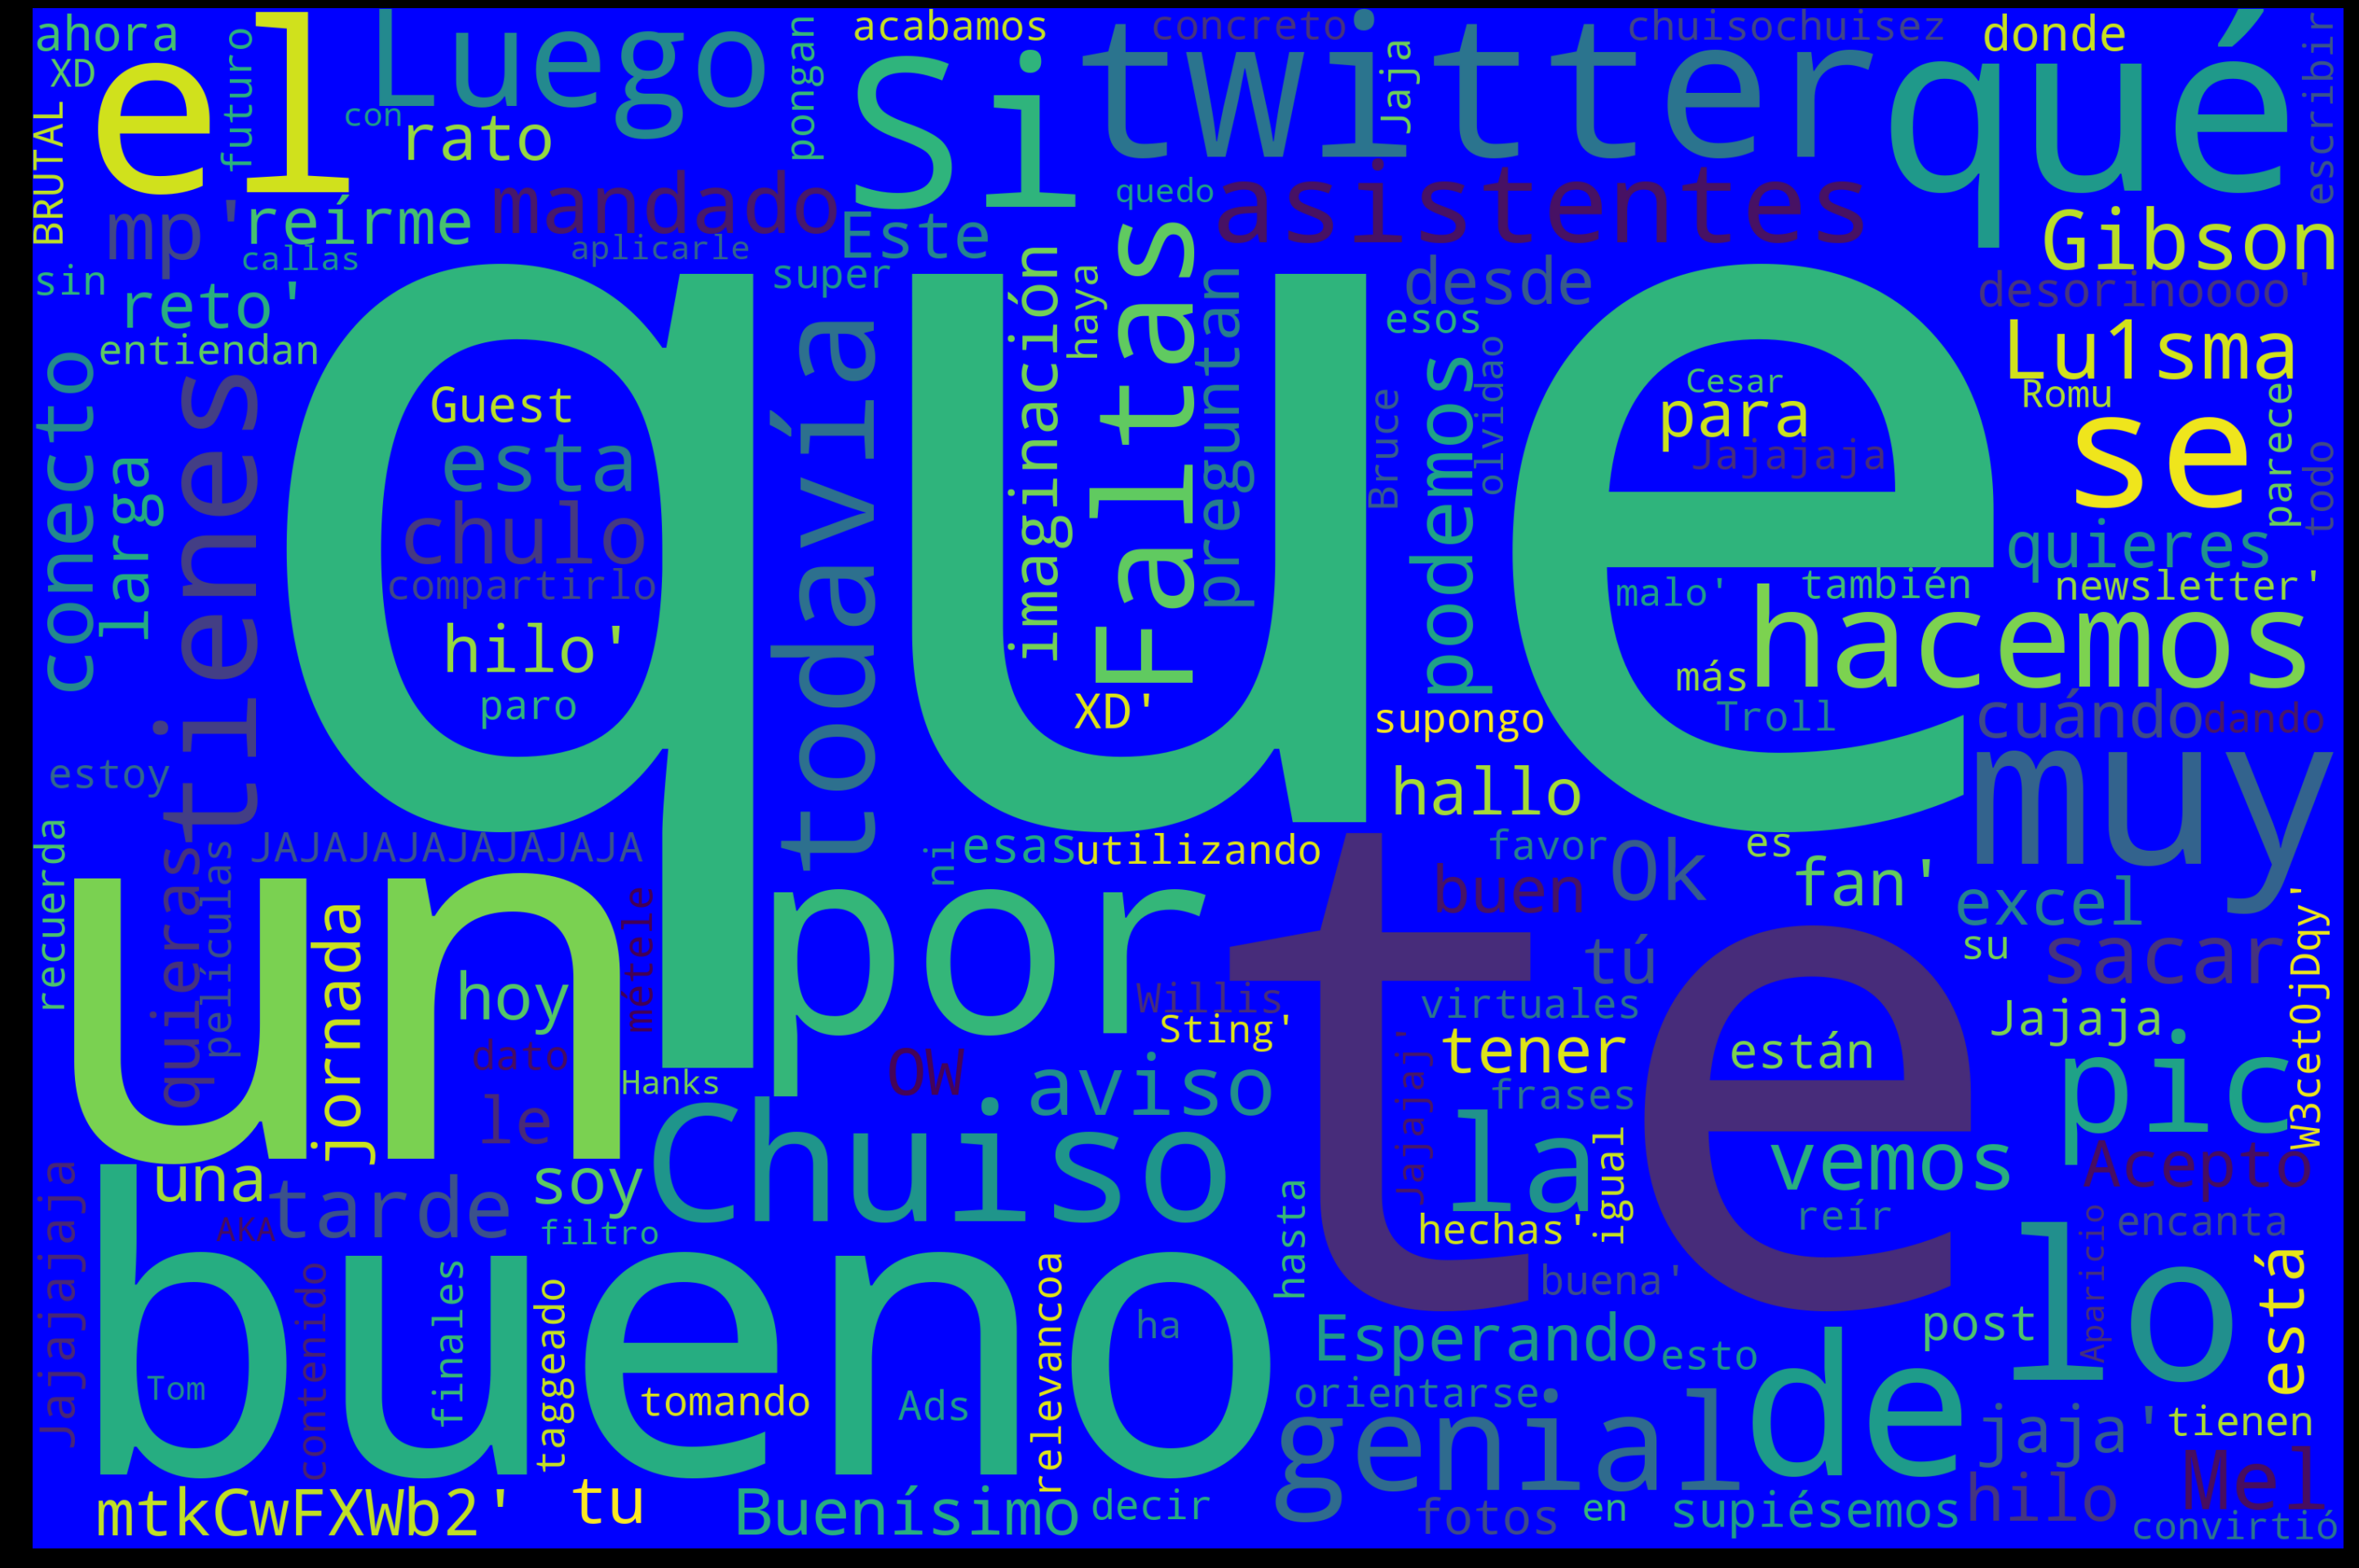

In [18]:
import os 
from os import path
from wordcloud import WordCloud, STOPWORDS

#Vamos a crear la nube con la librería wordcloud

%matplotlib inline
import matplotlib.pyplot as plt
text = tweets.values
wordcloud= WordCloud(
    width = 3000,
    height = 2000,
    background_color = 'blue',
    stopwords = STOPWORDS).generate(str(text))
fig = plt.figure(
    figsize = (40, 30),
    facecolor = 'k',
    edgecolor  = 'k')
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

In [92]:
from textblob import TextBlob
# Function to get sentiment 
def apply_blob(sentence):
    temp = TextBlob(sentence).sentiment[0]
    if temp == 0.0:
        return 0.0 # Neutral
    elif temp >= 0.0:
        return 1.0 # Positive
    else:
        return 2.0 # Negative

# UDF to write sentiment on DF
sentiment = udf(apply_blob, DoubleType())

# Transform result to pandas
def twint_to_pandas(columns):
    return twint.output.panda.Tweets_df[columns]

def tweets_sentiment(search, limit=1):
    c.Search = search
    # Custom output format
    c.Format = "Username: {username} |  Tweet: {tweet}"
    c.Limit = limit
    c.Pandas = True
    #with HiddenPrints():
    #    print(twint.run.Search(c))
    
    # Transform tweets to pandas DF
    df_pd = twint_to_pandas(["date", "username", "tweet", "hashtags", "nlikes"])
    
    # Transform Pandas DF to Optimus/Spark DF
    df = op.create.data_frame(pdf= df_pd)
    
    # Clean tweets
    clean_tweets = df.cols.remove_accents("tweet") \
                 .cols.remove_special_chars("tweet")
    
    # Add sentiment to final DF
    return clean_tweets.withColumn("sentiment", sentiment(clean_tweets['tweet']))

In [93]:
df_result = tweets_sentiment("JaviLazaro", limit=1)

NameError: name 'op' is not defined

In [95]:
import sys
module = sys.modules["twint.storage.write"]

def Json(obj, config):
    tweet = obj.__dict__
    print(tweet)

module.Json = Json

c = twint.Config()
c.Search = "JaviLazaro"
c.Store_json = True
c.Custom["user"] = ["date", "username", "tweet", "hashtags", "nlikes"]
c.User_full = True
c.Output = "tweets.json"
#c.Since = "2019-05-20"
c.Hide_output = True

twint.run.Search(c)

{'id': 1273656973779701761, 'id_str': '1273656973779701761', 'conversation_id': '1273655257567055873', 'datetime': 1592498460000, 'datestamp': '2020-06-18', 'timestamp': '18:41:00', 'user_id': 1058315163286286337, 'user_id_str': '1058315163286286337', 'username': 'javilazaroseo', 'name': 'JaviLázaro', 'place': '', 'timezone': 'Hora de ver. Europa Occidental', 'mentions': ['aro_mdz'], 'urls': [], 'photos': [], 'video': 1, 'tweet': 'Esto es moda, la creo guardiola y se mantiene, no te preocupes por ello, piensa que las modas vuelven y volvera el oelo a tazon con raya marcada en medio, tu te libras pic.twitter.com/Om9fMODOiO', 'hashtags': [], 'cashtags': [], 'replies_count': '0', 'retweets_count': '0', 'likes_count': '1', 'link': 'https://twitter.com/JaviLazaroSEO/status/1273656973779701761', 'user_rt_id': '', 'user_rt': '', 'retweet': False, 'retweet_id': '', 'retweet_date': '', 'quote_url': '', 'near': '', 'geo': '', 'source': '', 'reply_to': [{'user_id': '1058315163286286337', 'usernam

{'id': 1272642961659101187, 'id_str': '1272642961659101187', 'conversation_id': '1272620077574127617', 'datetime': 1592256701000, 'datestamp': '2020-06-15', 'timestamp': '23:31:41', 'user_id': 1058315163286286337, 'user_id_str': '1058315163286286337', 'username': 'javilazaroseo', 'name': 'JaviLázaro', 'place': '', 'timezone': 'Hora de ver. Europa Occidental', 'mentions': ['mxideas', 'pedroseo_'], 'urls': [], 'photos': [], 'video': 1, 'tweet': 'Te miro la de twitter??? pic.twitter.com/0yyEeXXS3R', 'hashtags': [], 'cashtags': [], 'replies_count': '1', 'retweets_count': '0', 'likes_count': '0', 'link': 'https://twitter.com/JaviLazaroSEO/status/1272642961659101187', 'user_rt_id': '', 'user_rt': '', 'retweet': False, 'retweet_id': '', 'retweet_date': '', 'quote_url': '', 'near': '', 'geo': '', 'source': '', 'reply_to': [{'user_id': '1058315163286286337', 'username': 'JaviLazaroSEO'}, {'user_id': '131520893', 'username': 'mxideas'}, {'user_id': '907176756909625344', 'username': 'PedroSEO_'}]

{'id': 1271869280276172800, 'id_str': '1271869280276172800', 'conversation_id': '1271778730759897090', 'datetime': 1592072241000, 'datestamp': '2020-06-13', 'timestamp': '20:17:21', 'user_id': 1058315163286286337, 'user_id_str': '1058315163286286337', 'username': 'javilazaroseo', 'name': 'JaviLázaro', 'place': '', 'timezone': 'Hora de ver. Europa Occidental', 'mentions': ['vivirenremoto', 'sciencemiguel'], 'urls': [], 'photos': [], 'video': 0, 'tweet': 'Pues te voy a ser sincero, no los uso por ahora ya que estoy usando cosas "pequeñas" pero se que @ScienceMiguel está usando uno y parece ser que le va bien', 'hashtags': [], 'cashtags': [], 'replies_count': '1', 'retweets_count': '0', 'likes_count': '0', 'link': 'https://twitter.com/JaviLazaroSEO/status/1271869280276172800', 'user_rt_id': '', 'user_rt': '', 'retweet': False, 'retweet_id': '', 'retweet_date': '', 'quote_url': '', 'near': '', 'geo': '', 'source': '', 'reply_to': [{'user_id': '1058315163286286337', 'username': 'JaviLazaroS

{'id': 1271189686963384320, 'id_str': '1271189686963384320', 'conversation_id': '1271187785857339394', 'datetime': 1591910213000, 'datestamp': '2020-06-11', 'timestamp': '23:16:53', 'user_id': 1058315163286286337, 'user_id_str': '1058315163286286337', 'username': 'javilazaroseo', 'name': 'JaviLázaro', 'place': '', 'timezone': 'Hora de ver. Europa Occidental', 'mentions': ['lilyraynyc'], 'urls': [], 'photos': [], 'video': 0, 'tweet': 'Music?', 'hashtags': [], 'cashtags': [], 'replies_count': '1', 'retweets_count': '0', 'likes_count': '0', 'link': 'https://twitter.com/JaviLazaroSEO/status/1271189686963384320', 'user_rt_id': '', 'user_rt': '', 'retweet': False, 'retweet_id': '', 'retweet_date': '', 'quote_url': '', 'near': '', 'geo': '', 'source': '', 'reply_to': [{'user_id': '1058315163286286337', 'username': 'JaviLazaroSEO'}, {'user_id': '29074075', 'username': 'lilyraynyc'}], 'translate': '', 'trans_src': '', 'trans_dest': ''}
{'id': 1271188332794580998, 'id_str': '1271188332794580998'

{'id': 1148622689604706304, 'id_str': '1148622689604706304', 'conversation_id': '1148622689604706304', 'datetime': 1562687964000, 'datestamp': '2019-07-09', 'timestamp': '17:59:24', 'user_id': 1058315163286286337, 'user_id_str': '1058315163286286337', 'username': 'javilazaroseo', 'name': 'JaviLázaro', 'place': '', 'timezone': 'Hora de ver. Europa Occidental', 'mentions': [], 'urls': ['https://local.google.com/place?id=12257244525242884297&use=posts&lpsid=1525968934814801891'], 'photos': [], 'video': 0, 'tweet': 'JaviLazaro SEO on #Google  https://local.google.com/place?id=12257244525242884297&use=posts&lpsid=1525968934814801891\xa0…\nYa está empezando la nueva aventura, vamos a por todas', 'hashtags': ['#google'], 'cashtags': [], 'replies_count': '0', 'retweets_count': '3', 'likes_count': '2', 'link': 'https://twitter.com/JaviLazaroSEO/status/1148622689604706304', 'user_rt_id': '', 'user_rt': '', 'retweet': False, 'retweet_id': '', 'retweet_date': '', 'quote_url': '', 'near': '', 'geo'

{'id': 1095054903603531782, 'id_str': '1095054903603531782', 'conversation_id': '1094879723967184896', 'datetime': 1549916408000, 'datestamp': '2019-02-11', 'timestamp': '21:20:08', 'user_id': 968480591669858304, 'user_id_str': '968480591669858304', 'username': 'martamv11', 'name': 'MartaMV', 'place': '', 'timezone': 'Hora de ver. Europa Occidental', 'mentions': ['andreulb', 'rubenmurciaprie', 'javilazaro_'], 'urls': [], 'photos': ['https://pbs.twimg.com/media/DzJqoVuXgAMjHzI.jpg'], 'video': 0, 'tweet': '😂😂😂😂 pic.twitter.com/vi5VC1bBYR', 'hashtags': [], 'cashtags': [], 'replies_count': '0', 'retweets_count': '0', 'likes_count': '2', 'link': 'https://twitter.com/MartaMV11/status/1095054903603531782', 'user_rt_id': '', 'user_rt': '', 'retweet': False, 'retweet_id': '', 'retweet_date': '', 'quote_url': '', 'near': '', 'geo': '', 'source': '', 'reply_to': [{'user_id': '968480591669858304', 'username': 'MartaMV11'}, {'user_id': '234870145', 'username': 'andreulb'}, {'user_id': '1218198403',

{'id': 1069678839226384384, 'id_str': '1069678839226384384', 'conversation_id': '1069678839226384384', 'datetime': 1543866283000, 'datestamp': '2018-12-03', 'timestamp': '20:44:43', 'user_id': 275081370, 'user_id_str': '275081370', 'username': 'oscrsd', 'name': 'Óscar Solé', 'place': '', 'timezone': 'Hora de ver. Europa Occidental', 'mentions': ['javilazaro'], 'urls': ['https://twitter.com/Ka_Khumu/status/1069674151852548096'], 'photos': [], 'video': 0, 'tweet': '@Javilazaro @Mark271010 a ver si nos toca !  https://twitter.com/Ka_Khumu/status/1069674151852548096\xa0…', 'hashtags': [], 'cashtags': [], 'replies_count': '0', 'retweets_count': '1', 'likes_count': '0', 'link': 'https://twitter.com/OscrSD/status/1069678839226384384', 'user_rt_id': '', 'user_rt': '', 'retweet': False, 'retweet_id': '', 'retweet_date': '', 'quote_url': 'https://twitter.com/Ka_Khumu/status/1069674151852548096', 'near': '', 'geo': '', 'source': '', 'reply_to': [{'user_id': '275081370', 'username': 'OscrSD'}, {'u

{'id': 1046419224963547136, 'id_str': '1046419224963547136', 'conversation_id': '1045966315373154306', 'datetime': 1538320759000, 'datestamp': '2018-09-30', 'timestamp': '17:19:19', 'user_id': 846045914972258304, 'user_id_str': '846045914972258304', 'username': 'torrejonaa', 'name': 'Alejandro Torrejon', 'place': '', 'timezone': 'Hora de ver. Europa Occidental', 'mentions': ['jorgegarbas', 'javilazaro_'], 'urls': [], 'photos': [], 'video': 0, 'tweet': 'Es un hombre con altos niveles de hipertrofia por supuesto, sobretodo ahora que ha bajado 20 kg de grasa y parece un superculturista, gracias a pócimas secretas que ninguno conocemos. De hecho nos viene al pelo este hombre porque está perdiendo FFM y FM pq le es insostenible.', 'hashtags': [], 'cashtags': [], 'replies_count': '1', 'retweets_count': '0', 'likes_count': '0', 'link': 'https://twitter.com/TorrejonAA/status/1046419224963547136', 'user_rt_id': '', 'user_rt': '', 'retweet': False, 'retweet_id': '', 'retweet_date': '', 'quote_ur

{'id': 1046360622953353217, 'id_str': '1046360622953353217', 'conversation_id': '1045966315373154306', 'datetime': 1538306787000, 'datestamp': '2018-09-30', 'timestamp': '13:26:27', 'user_id': 895463425, 'user_id_str': '895463425', 'username': 'javilazaro_', 'name': 'Javi', 'place': '', 'timezone': 'Hora de ver. Europa Occidental', 'mentions': ['jorgegarbas'], 'urls': [], 'photos': [], 'video': 0, 'tweet': 'Yo no conozco niños enfermos por intentar "hipertrofiar". Pero bueno, hipertrofia quiere decir ganancia muscular, y más músculo significa más salud en la mayoría de los casos. No se puede lanzar un mensaje de que la hipertrofia no busca salud, Jorge.', 'hashtags': [], 'cashtags': [], 'replies_count': '1', 'retweets_count': '0', 'likes_count': '3', 'link': 'https://twitter.com/JaviLazaro_/status/1046360622953353217', 'user_rt_id': '', 'user_rt': '', 'retweet': False, 'retweet_id': '', 'retweet_date': '', 'quote_url': '', 'near': '', 'geo': '', 'source': '', 'reply_to': [{'user_id': '

{'id': 1036815898760437760, 'id_str': '1036815898760437760', 'conversation_id': '1036751240917655553', 'datetime': 1536031148000, 'datestamp': '2018-09-04', 'timestamp': '05:19:08', 'user_id': 958339525423648769, 'user_id_str': '958339525423648769', 'username': 'ausinjaco', 'name': 'Jaco', 'place': '', 'timezone': 'Hora de ver. Europa Occidental', 'mentions': ['miguelwino', 'penorac', 'missassassin11', 'grimjow720', 'javiercervera35', 'javilazaro', 'oscarlopez4770', 'titopanzer'], 'urls': [], 'photos': [], 'video': 0, 'tweet': 'Unos se acuestan y otros se levantan.k mal.repartido ta el mundo macho', 'hashtags': [], 'cashtags': [], 'replies_count': '0', 'retweets_count': '0', 'likes_count': '3', 'link': 'https://twitter.com/AusinJaco/status/1036815898760437760', 'user_rt_id': '', 'user_rt': '', 'retweet': False, 'retweet_id': '', 'retweet_date': '', 'quote_url': '', 'near': '', 'geo': '', 'source': '', 'reply_to': [{'user_id': '958339525423648769', 'username': 'AusinJaco'}, {'user_id': 

{'id': 1027180155863818240, 'id_str': '1027180155863818240', 'conversation_id': '1027180155863818240', 'datetime': 1533733807000, 'datestamp': '2018-08-08', 'timestamp': '15:10:07', 'user_id': 895463425, 'user_id_str': '895463425', 'username': 'javilazaro_', 'name': 'Javi', 'place': '', 'timezone': 'Hora de ver. Europa Occidental', 'mentions': ['adryben44'], 'urls': ['https://www.lavozdegalicia.es/noticia/amarina/2018/08/08/adrian-ben-dio-cara-primer-europeo-absoluto/00031533723809923346994.htm'], 'photos': [], 'video': 0, 'tweet': 'Haber conseguido plaza ya era premio. Ánimo @adryben44, lo mejor está por llegar. https://www.lavozdegalicia.es/noticia/amarina/2018/08/08/adrian-ben-dio-cara-primer-europeo-absoluto/00031533723809923346994.htm\xa0…', 'hashtags': [], 'cashtags': [], 'replies_count': '0', 'retweets_count': '1', 'likes_count': '4', 'link': 'https://twitter.com/JaviLazaro_/status/1027180155863818240', 'user_rt_id': '', 'user_rt': '', 'retweet': False, 'retweet_id': '', 'retwee

{'id': 1015185837867307009, 'id_str': '1015185837867307009', 'conversation_id': '1014991928620961792', 'datetime': 1530874139000, 'datestamp': '2018-07-06', 'timestamp': '12:48:59', 'user_id': 853968095643398144, 'user_id_str': '853968095643398144', 'username': 'penorac', 'name': 'Penor Competición', 'place': '', 'timezone': 'Hora de ver. Europa Occidental', 'mentions': ['miguelwino', 'oscrsd', 'javilazaro', 'ausinjaco'], 'urls': [], 'photos': [], 'video': 0, 'tweet': 'Yo siempre voy recto, así no tengo pérdida !!!', 'hashtags': [], 'cashtags': [], 'replies_count': '1', 'retweets_count': '0', 'likes_count': '3', 'link': 'https://twitter.com/PenorAC/status/1015185837867307009', 'user_rt_id': '', 'user_rt': '', 'retweet': False, 'retweet_id': '', 'retweet_date': '', 'quote_url': '', 'near': '', 'geo': '', 'source': '', 'reply_to': [{'user_id': '853968095643398144', 'username': 'PenorAC'}, {'user_id': '617276157', 'username': 'MiguelWino'}, {'user_id': '275081370', 'username': 'OscrSD'}, 

{'id': 1015161066081439744, 'id_str': '1015161066081439744', 'conversation_id': '1014991928620961792', 'datetime': 1530868233000, 'datestamp': '2018-07-06', 'timestamp': '11:10:33', 'user_id': 69885676, 'user_id_str': '69885676', 'username': 'javilazaro', 'name': 'Javi Lazaro', 'place': '', 'timezone': 'Hora de ver. Europa Occidental', 'mentions': ['miguelwino', 'penorac', 'ausinjaco'], 'urls': [], 'photos': [], 'video': 0, 'tweet': 'A jajajaja relax.... estoy probando.. aún no os cedo mis pertenencias ni nada...🤣', 'hashtags': [], 'cashtags': [], 'replies_count': '1', 'retweets_count': '0', 'likes_count': '3', 'link': 'https://twitter.com/Javilazaro/status/1015161066081439744', 'user_rt_id': '', 'user_rt': '', 'retweet': False, 'retweet_id': '', 'retweet_date': '', 'quote_url': '', 'near': '', 'geo': '', 'source': '', 'reply_to': [{'user_id': '69885676', 'username': 'Javilazaro'}, {'user_id': '617276157', 'username': 'MiguelWino'}, {'user_id': '853968095643398144', 'username': 'PenorA

{'id': 1001795000278102017, 'id_str': '1001795000278102017', 'conversation_id': '1001794052809949184', 'datetime': 1527681515000, 'datestamp': '2018-05-30', 'timestamp': '13:58:35', 'user_id': 1269794671, 'user_id_str': '1269794671', 'username': 'pilarhuemart', 'name': 'Pilar Hueso', 'place': '', 'timezone': 'Hora de ver. Europa Occidental', 'mentions': ['ferrancanes', 'adrianbenitez4', 'javilazaro_', 'carloslmsm', 'wndymntiel', 'mytrainingshoes'], 'urls': [], 'photos': ['https://pbs.twimg.com/media/DecXPdgW0AAP2-F.jpg'], 'video': 0, 'tweet': ' pic.twitter.com/LyOUM1a9rO', 'hashtags': [], 'cashtags': [], 'replies_count': '1', 'retweets_count': '6', 'likes_count': '19', 'link': 'https://twitter.com/pilarhuemart/status/1001795000278102017', 'user_rt_id': '', 'user_rt': '', 'retweet': False, 'retweet_id': '', 'retweet_date': '', 'quote_url': '', 'near': '', 'geo': '', 'source': '', 'reply_to': [{'user_id': '1269794671', 'username': 'pilarhuemart'}, {'user_id': '818127190747389952', 'usern

{'id': 998317164049391617, 'id_str': '998317164049391617', 'conversation_id': '997938922368978949', 'datetime': 1526852334000, 'datestamp': '2018-05-20', 'timestamp': '23:38:54', 'user_id': 859656898727092224, 'user_id_str': '859656898727092224', 'username': 'rrodrigol74', 'name': 'Raul Rodrigo', 'place': '', 'timezone': 'Hora de ver. Europa Occidental', 'mentions': ['penorac', 'carahero', 'javisanchezlope', 'ausinjaco', 'oscarlopez4770', 'derek_issa83', 'marck73_', 'jezu_1996', 'portojr46', 'oscrsd', 'vulcano09', 'javilazaro', 'titopanzer', 'arykem1', 'josemirr93gamer', 'scyyloo', 'dani_ltz', 'ddp78diego', 'gabri190399'], 'urls': [], 'photos': [], 'video': 0, 'tweet': 'No hay porqué darlas, sabeís que podeís contar conmigo para lo que necesiteis.\nP.D.: @titopanzer , cuando te menciono a ti, es por que eres el jefe de equipo y sé como lo pasaste, pero quiero referirme a lo bien que lo estais haciendo todos en conjunto. Suerte Cracks.', 'hashtags': [], 'cashtags': [], 'replies_count': 

{'id': 989127625334542336, 'id_str': '989127625334542336', 'conversation_id': '989126768551440384', 'datetime': 1524661377000, 'datestamp': '2018-04-25', 'timestamp': '15:02:57', 'user_id': 284429329, 'user_id_str': '284429329', 'username': 'pacolopez_pt', 'name': 'Paco López', 'place': '', 'timezone': 'Hora de ver. Europa Occidental', 'mentions': ['ferrancanes', 'carloslmsm', 'pilarhuemart', 'charlyelvi', 'adrianbenitez4', 'tomfrere', 'javilazaro_', 'crltoletum'], 'urls': [], 'photos': [], 'video': 0, 'tweet': 'Esta me ha encantado!  🤣', 'hashtags': [], 'cashtags': [], 'replies_count': '0', 'retweets_count': '0', 'likes_count': '3', 'link': 'https://twitter.com/pacolopez_pt/status/989127625334542336', 'user_rt_id': '', 'user_rt': '', 'retweet': False, 'retweet_id': '', 'retweet_date': '', 'quote_url': '', 'near': '', 'geo': '', 'source': '', 'reply_to': [{'user_id': '284429329', 'username': 'pacolopez_pt'}, {'user_id': '818127190747389952', 'username': 'FerranCanes'}, {'user_id': '735

{'id': 984040771157397504, 'id_str': '984040771157397504', 'conversation_id': '978251150557401088', 'datetime': 1523448577000, 'datestamp': '2018-04-11', 'timestamp': '14:09:37', 'user_id': 3074640441, 'user_id_str': '3074640441', 'username': 'fullmotioner', 'name': 'Narcís Fernandez', 'place': '', 'timezone': 'Hora de ver. Europa Occidental', 'mentions': ['provesfisiques', 'danifrei2', 'piensayentrena', 'ruben91pt', 'jorgegarbas', 'saratab', 'trainingjuanrl', 'javilazaro_', 'fisiocastejon', 'aherra27'], 'urls': [], 'photos': [], 'video': 0, 'tweet': 'Gracias por la mención!!! 👌👌', 'hashtags': [], 'cashtags': [], 'replies_count': '1', 'retweets_count': '0', 'likes_count': '1', 'link': 'https://twitter.com/fullmotioner/status/984040771157397504', 'user_rt_id': '', 'user_rt': '', 'retweet': False, 'retweet_id': '', 'retweet_date': '', 'quote_url': '', 'near': '', 'geo': '', 'source': '', 'reply_to': [{'user_id': '3074640441', 'username': 'fullmotioner'}, {'user_id': '398018490', 'usernam

{'id': 983608995905720320, 'id_str': '983608995905720320', 'conversation_id': '983608995905720320', 'datetime': 1523345633000, 'datestamp': '2018-04-10', 'timestamp': '09:33:53', 'user_id': 895463425, 'user_id_str': '895463425', 'username': 'javilazaro_', 'name': 'Javi', 'place': '', 'timezone': 'Hora de ver. Europa Occidental', 'mentions': [], 'urls': ['https://twitter.com/materia_ciencia/status/983342460465229826'], 'photos': [], 'video': 0, 'tweet': '🤔 https://twitter.com/materia_ciencia/status/983342460465229826\xa0…', 'hashtags': [], 'cashtags': [], 'replies_count': '0', 'retweets_count': '0', 'likes_count': '1', 'link': 'https://twitter.com/JaviLazaro_/status/983608995905720320', 'user_rt_id': '', 'user_rt': '', 'retweet': False, 'retweet_id': '', 'retweet_date': '', 'quote_url': 'https://twitter.com/materia_ciencia/status/983342460465229826', 'near': '', 'geo': '', 'source': '', 'reply_to': [{'user_id': '895463425', 'username': 'JaviLazaro_'}], 'translate': '', 'trans_src': '', 

{'id': 978639777137418241, 'id_str': '978639777137418241', 'conversation_id': '978251150557401088', 'datetime': 1522160879000, 'datestamp': '2018-03-27', 'timestamp': '16:27:59', 'user_id': 70031051, 'user_id_str': '70031051', 'username': 'srtamystique', 'name': 'LadyGoDiva', 'place': '', 'timezone': 'Hora de ver. Europa Occidental', 'mentions': ['piensayentrena', 'ruben91pt', 'jorgegarbas', 'saratab', 'trainingjuanrl', 'provesfisiques', 'javilazaro_', 'fullmotioner'], 'urls': [], 'photos': [], 'video': 0, 'tweet': 'No estoy de acuerdo! me parece que en ambos ejemplos hay ejercicios altamente funcionales y efectivos para glúteos ! Muchas veces nos pasamos de “opinologos” en cuestión de la efectividad de los ejercicios, pero la experiencia y el conocimiento me llevarán a otras conclusiones.', 'hashtags': [], 'cashtags': [], 'replies_count': '3', 'retweets_count': '0', 'likes_count': '0', 'link': 'https://twitter.com/SrtaMystique/status/978639777137418241', 'user_rt_id': '', 'user_rt': '

{'id': 970700934568402947, 'id_str': '970700934568402947', 'conversation_id': '970699922604482560', 'datetime': 1520268112000, 'datestamp': '2018-03-05', 'timestamp': '17:41:52', 'user_id': 951796363053993985, 'user_id_str': '951796363053993985', 'username': 'jezu_1996', 'name': 'Jezu1996', 'place': '', 'timezone': 'Hora de ver. Europa Occidental', 'mentions': ['oscrsd', 'nihilistablonde', 'javilazaro'], 'urls': [], 'photos': [], 'video': 0, 'tweet': 'Yo soy estudiante asi que estoy to pobre...  Jaja', 'hashtags': [], 'cashtags': [], 'replies_count': '0', 'retweets_count': '0', 'likes_count': '0', 'link': 'https://twitter.com/Jezu_1996/status/970700934568402947', 'user_rt_id': '', 'user_rt': '', 'retweet': False, 'retweet_id': '', 'retweet_date': '', 'quote_url': '', 'near': '', 'geo': '', 'source': '', 'reply_to': [{'user_id': '951796363053993985', 'username': 'Jezu_1996'}, {'user_id': '275081370', 'username': 'OscrSD'}, {'user_id': '132452382', 'username': 'NihilistaBlonde'}, {'user_

{'id': 964140387072913409, 'id_str': '964140387072913409', 'conversation_id': '964140387072913409', 'datetime': 1518703955000, 'datestamp': '2018-02-15', 'timestamp': '15:12:35', 'user_id': 895463425, 'user_id_str': '895463425', 'username': 'javilazaro_', 'name': 'Javi', 'place': '', 'timezone': 'Hora de ver. Europa Occidental', 'mentions': [], 'urls': ['https://elpais.com/ccaa/2018/02/11/madrid/1518372888_443211.html'], 'photos': [], 'video': 0, 'tweet': 'El 47% de los madrileños tiene sobrepeso u obesidad. Y la responsabilidad no es únicamente individual. https://elpais.com/ccaa/2018/02/11/madrid/1518372888_443211.html\xa0…', 'hashtags': [], 'cashtags': [], 'replies_count': '0', 'retweets_count': '0', 'likes_count': '0', 'link': 'https://twitter.com/JaviLazaro_/status/964140387072913409', 'user_rt_id': '', 'user_rt': '', 'retweet': False, 'retweet_id': '', 'retweet_date': '', 'quote_url': '', 'near': '', 'geo': '', 'source': '', 'reply_to': [{'user_id': '895463425', 'username': 'Javi

{'id': 957740358326276096, 'id_str': '957740358326276096', 'conversation_id': '957740358326276096', 'datetime': 1517178070000, 'datestamp': '2018-01-28', 'timestamp': '23:21:10', 'user_id': 895463425, 'user_id_str': '895463425', 'username': 'javilazaro_', 'name': 'Javi', 'place': '', 'timezone': 'Hora de ver. Europa Occidental', 'mentions': ['jesusrivilla'], 'urls': [], 'photos': [], 'video': 0, 'tweet': 'Enhorabuena @JesusRivilla. Un placer aprender de referentes como tú. #Hispanos', 'hashtags': ['#hispanos'], 'cashtags': [], 'replies_count': '0', 'retweets_count': '0', 'likes_count': '2', 'link': 'https://twitter.com/JaviLazaro_/status/957740358326276096', 'user_rt_id': '', 'user_rt': '', 'retweet': False, 'retweet_id': '', 'retweet_date': '', 'quote_url': '', 'near': '', 'geo': '', 'source': '', 'reply_to': [{'user_id': '895463425', 'username': 'JaviLazaro_'}, {'user_id': '148503637', 'username': 'JesusRivilla'}], 'translate': '', 'trans_src': '', 'trans_dest': ''}
{'id': 9577292458

{'id': 956635000841089024, 'id_str': '956635000841089024', 'conversation_id': '956634390217543680', 'datetime': 1516914532000, 'datestamp': '2018-01-25', 'timestamp': '22:08:52', 'user_id': 895463425, 'user_id_str': '895463425', 'username': 'javilazaro_', 'name': 'Javi', 'place': '', 'timezone': 'Hora de ver. Europa Occidental', 'mentions': [], 'urls': [], 'photos': ['https://pbs.twimg.com/media/DUambQkX4AcvUiZ.jpg', 'https://pbs.twimg.com/media/DUamb79XUAAWN-E.jpg', 'https://pbs.twimg.com/media/DUamckXXUAAQEfL.jpg', 'https://pbs.twimg.com/media/DUamdROXkAEmtR1.jpg'], 'video': 0, 'tweet': ' pic.twitter.com/hyK9KoEgA2', 'hashtags': [], 'cashtags': [], 'replies_count': '1', 'retweets_count': '9', 'likes_count': '11', 'link': 'https://twitter.com/JaviLazaro_/status/956635000841089024', 'user_rt_id': '', 'user_rt': '', 'retweet': False, 'retweet_id': '', 'retweet_date': '', 'quote_url': '', 'near': '', 'geo': '', 'source': '', 'reply_to': [{'user_id': '895463425', 'username': 'JaviLazaro_'

{'id': 951143365877346304, 'id_str': '951143365877346304', 'conversation_id': '951143365877346304', 'datetime': 1515605224000, 'datestamp': '2018-01-10', 'timestamp': '18:27:04', 'user_id': 895463425, 'user_id_str': '895463425', 'username': 'javilazaro_', 'name': 'Javi', 'place': '', 'timezone': 'Hora de ver. Europa Occidental', 'mentions': [], 'urls': [], 'photos': ['https://pbs.twimg.com/media/DTMj2IXXkAEuuB6.jpg'], 'video': 0, 'tweet': '⚠️ ¿Dolor de muñecas al hacer sentadilla? ⚠️ pic.twitter.com/IeKyTR838N', 'hashtags': [], 'cashtags': [], 'replies_count': '1', 'retweets_count': '2', 'likes_count': '2', 'link': 'https://twitter.com/JaviLazaro_/status/951143365877346304', 'user_rt_id': '', 'user_rt': '', 'retweet': False, 'retweet_id': '', 'retweet_date': '', 'quote_url': '', 'near': '', 'geo': '', 'source': '', 'reply_to': [{'user_id': '895463425', 'username': 'JaviLazaro_'}], 'translate': '', 'trans_src': '', 'trans_dest': ''}
{'id': 950273932636114945, 'id_str': '9502739326361149

{'id': 944586651631849472, 'id_str': '944586651631849472', 'conversation_id': '906478887118524416', 'datetime': 1514041981000, 'datestamp': '2017-12-23', 'timestamp': '16:13:01', 'user_id': 895463425, 'user_id_str': '895463425', 'username': 'javilazaro_', 'name': 'Javi', 'place': '', 'timezone': 'Hora de ver. Europa Occidental', 'mentions': ['miguelvime'], 'urls': [], 'photos': [], 'video': 0, 'tweet': '¿Hernia como adaptación fisiológica normal que no causan problemas? No sé, los operados de hernias, que no son pocos, no creo que opinen lo mismo', 'hashtags': [], 'cashtags': [], 'replies_count': '2', 'retweets_count': '0', 'likes_count': '0', 'link': 'https://twitter.com/JaviLazaro_/status/944586651631849472', 'user_rt_id': '', 'user_rt': '', 'retweet': False, 'retweet_id': '', 'retweet_date': '', 'quote_url': '', 'near': '', 'geo': '', 'source': '', 'reply_to': [{'user_id': '895463425', 'username': 'JaviLazaro_'}, {'user_id': '785598798', 'username': 'MiguelVime'}], 'translate': '', 

{'id': 941707252116934656, 'id_str': '941707252116934656', 'conversation_id': '941707252116934656', 'datetime': 1513355479000, 'datestamp': '2017-12-15', 'timestamp': '17:31:19', 'user_id': 895463425, 'user_id_str': '895463425', 'username': 'javilazaro_', 'name': 'Javi', 'place': '', 'timezone': 'Hora de ver. Europa Occidental', 'mentions': ['mikelizquierdo_', 'simposiofuerza'], 'urls': [], 'photos': [], 'video': 0, 'tweet': 'Espectacular la ponencia de @mikelizquierdo_ en el @SimposioFuerza. Transmite el mensaje de una manera increíble.\n#sdf17', 'hashtags': ['#sdf17'], 'cashtags': [], 'replies_count': '1', 'retweets_count': '1', 'likes_count': '2', 'link': 'https://twitter.com/JaviLazaro_/status/941707252116934656', 'user_rt_id': '', 'user_rt': '', 'retweet': False, 'retweet_id': '', 'retweet_date': '', 'quote_url': '', 'near': '', 'geo': '', 'source': '', 'reply_to': [{'user_id': '895463425', 'username': 'JaviLazaro_'}, {'user_id': '3236872559', 'username': 'mikelizquierdo_'}, {'use

{'id': 932688324782936065, 'id_str': '932688324782936065', 'conversation_id': '932653075449466881', 'datetime': 1511205199000, 'datestamp': '2017-11-20', 'timestamp': '20:13:19', 'user_id': 124430054, 'user_id_str': '124430054', 'username': 'vanderlem', 'name': 'David Castellanos', 'place': '', 'timezone': 'Hora de ver. Europa Occidental', 'mentions': ['alvarado_mh', 'javilazaro_'], 'urls': [], 'photos': [], 'video': 0, 'tweet': '¿Qué ejercicios tecomendarías para mejorar la movilidad del hombro?', 'hashtags': [], 'cashtags': [], 'replies_count': '1', 'retweets_count': '0', 'likes_count': '0', 'link': 'https://twitter.com/vanderlem/status/932688324782936065', 'user_rt_id': '', 'user_rt': '', 'retweet': False, 'retweet_id': '', 'retweet_date': '', 'quote_url': '', 'near': '', 'geo': '', 'source': '', 'reply_to': [{'user_id': '124430054', 'username': 'vanderlem'}, {'user_id': '339059495', 'username': 'Alvarado_MH'}, {'user_id': '895463425', 'username': 'JaviLazaro_'}], 'translate': '', '

{'id': 929853014818676736, 'id_str': '929853014818676736', 'conversation_id': '929837000198369280', 'datetime': 1510529209000, 'datestamp': '2017-11-13', 'timestamp': '00:26:49', 'user_id': 3026255949, 'user_id_str': '3026255949', 'username': 'sergiomcoach', 'name': 'Sergio M. Coach', 'place': '', 'timezone': 'Hora de ver. Europa Occidental', 'mentions': ['javilazaro_'], 'urls': [], 'photos': [], 'video': 0, 'tweet': 'Gracias Javi, eres un grande!! Ultimamente apenas twitteo gracias por ahorrarme trabajo 😏 a ver si tengo más tiempo y puedo volver por estos lares...', 'hashtags': [], 'cashtags': [], 'replies_count': '1', 'retweets_count': '0', 'likes_count': '0', 'link': 'https://twitter.com/SergioMCoach/status/929853014818676736', 'user_rt_id': '', 'user_rt': '', 'retweet': False, 'retweet_id': '', 'retweet_date': '', 'quote_url': '', 'near': '', 'geo': '', 'source': '', 'reply_to': [{'user_id': '3026255949', 'username': 'SergioMCoach'}, {'user_id': '895463425', 'username': 'JaviLazaro

{'id': 925096997283131393, 'id_str': '925096997283131393', 'conversation_id': '924994086800691201', 'datetime': 1509395286000, 'datestamp': '2017-10-30', 'timestamp': '21:28:06', 'user_id': 895463425, 'user_id_str': '895463425', 'username': 'javilazaro_', 'name': 'Javi', 'place': '', 'timezone': 'Hora de ver. Europa Occidental', 'mentions': ['javierbutra', 'inefmadrid'], 'urls': [], 'photos': [], 'video': 0, 'tweet': 'Allí nos vemos, además un lunes 👌🏽🤓', 'hashtags': [], 'cashtags': [], 'replies_count': '1', 'retweets_count': '0', 'likes_count': '1', 'link': 'https://twitter.com/JaviLazaro_/status/925096997283131393', 'user_rt_id': '', 'user_rt': '', 'retweet': False, 'retweet_id': '', 'retweet_date': '', 'quote_url': '', 'near': '', 'geo': '', 'source': '', 'reply_to': [{'user_id': '895463425', 'username': 'JaviLazaro_'}, {'user_id': '382044782', 'username': 'javierbutra'}, {'user_id': '424102262', 'username': 'inefmadrid'}], 'translate': '', 'trans_src': '', 'trans_dest': ''}
{'id': 

{'id': 921358203706855424, 'id_str': '921358203706855424', 'conversation_id': '921357817285677057', 'datetime': 1508503888000, 'datestamp': '2017-10-20', 'timestamp': '14:51:28', 'user_id': 818127190747389952, 'user_id_str': '818127190747389952', 'username': 'ferrancanes', 'name': 'Ferran Cañes Llopis', 'place': '', 'timezone': 'Hora de ver. Europa Occidental', 'mentions': ['adrianbenitez4', 'javilazaro_', 'tomfrere', 'charlyelvi'], 'urls': ['https://twitter.com/FerranCanes/status/920629393898254336'], 'photos': [], 'video': 0, 'tweet': 'LA SENTADILLA: TÉCNICA IDEAL (PARTE 1) https://twitter.com/FerranCanes/status/920629393898254336\xa0…', 'hashtags': [], 'cashtags': [], 'replies_count': '0', 'retweets_count': '2', 'likes_count': '3', 'link': 'https://twitter.com/FerranCanes/status/921358203706855424', 'user_rt_id': '', 'user_rt': '', 'retweet': False, 'retweet_id': '', 'retweet_date': '', 'quote_url': 'https://twitter.com/FerranCanes/status/920629393898254336', 'near': '', 'geo': '', 

{'id': 917125160246890497, 'id_str': '917125160246890497', 'conversation_id': '917125160246890497', 'datetime': 1507494652000, 'datestamp': '2017-10-08', 'timestamp': '22:30:52', 'user_id': 895463425, 'user_id_str': '895463425', 'username': 'javilazaro_', 'name': 'Javi', 'place': '', 'timezone': 'Hora de ver. Europa Occidental', 'mentions': [], 'urls': ['https://elpais.com/elpais/2017/10/05/ciencia/1507203156_260793.html'], 'photos': [], 'video': 0, 'tweet': 'El alcohol provoca 250.000 muertes por cáncer de hígado al año | Incluimos "la cervecita" y el vasito de vino.  https://elpais.com/elpais/2017/10/05/ciencia/1507203156_260793.html\xa0…', 'hashtags': [], 'cashtags': [], 'replies_count': '0', 'retweets_count': '0', 'likes_count': '2', 'link': 'https://twitter.com/JaviLazaro_/status/917125160246890497', 'user_rt_id': '', 'user_rt': '', 'retweet': False, 'retweet_id': '', 'retweet_date': '', 'quote_url': '', 'near': '', 'geo': '', 'source': '', 'reply_to': [{'user_id': '895463425', 'u

{'id': 911006125784432641, 'id_str': '911006125784432641', 'conversation_id': '911003543859007489', 'datetime': 1506035760000, 'datestamp': '2017-09-22', 'timestamp': '01:16:00', 'user_id': 895463425, 'user_id_str': '895463425', 'username': 'javilazaro_', 'name': 'Javi', 'place': '', 'timezone': 'Hora de ver. Europa Occidental', 'mentions': ['rubenmurciaprie'], 'urls': [], 'photos': [], 'video': 0, 'tweet': 'Buenas Rubén, crees que esos riesgos de los que habla el estudio superan los beneficios?', 'hashtags': [], 'cashtags': [], 'replies_count': '1', 'retweets_count': '0', 'likes_count': '1', 'link': 'https://twitter.com/JaviLazaro_/status/911006125784432641', 'user_rt_id': '', 'user_rt': '', 'retweet': False, 'retweet_id': '', 'retweet_date': '', 'quote_url': '', 'near': '', 'geo': '', 'source': '', 'reply_to': [{'user_id': '895463425', 'username': 'JaviLazaro_'}, {'user_id': '1218198403', 'username': 'RubenMurciaPrie'}], 'translate': '', 'trans_src': '', 'trans_dest': ''}
{'id': 9105

{'id': 909450125306626049, 'id_str': '909450125306626049', 'conversation_id': '909326604496666624', 'datetime': 1505664781000, 'datestamp': '2017-09-17', 'timestamp': '18:13:01', 'user_id': 243558772, 'user_id_str': '243558772', 'username': 'miguelfranco2', 'name': 'Miguel Franco', 'place': '', 'timezone': 'Hora de ver. Europa Occidental', 'mentions': ['javilazaro_', 'jlazarob', 'diegmunoz'], 'urls': ['https://drive.google.com/drive/folders/0B4F8Wt2EO08QS3E2LXhBdFpLc28?usp=sharing'], 'photos': [], 'video': 0, 'tweet': 'Ahí van los 8 primeros audios #Naukas17  https://drive.google.com/drive/folders/0B4F8Wt2EO08QS3E2LXhBdFpLc28?usp=sharing\xa0…', 'hashtags': ['#naukas17'], 'cashtags': [], 'replies_count': '1', 'retweets_count': '1', 'likes_count': '2', 'link': 'https://twitter.com/MiguelFranco2/status/909450125306626049', 'user_rt_id': '', 'user_rt': '', 'retweet': False, 'retweet_id': '', 'retweet_date': '', 'quote_url': '', 'near': '', 'geo': '', 'source': '', 'reply_to': [{'user_id': 

{'id': 907250541012701184, 'id_str': '907250541012701184', 'conversation_id': '907250541012701184', 'datetime': 1505140359000, 'datestamp': '2017-09-11', 'timestamp': '16:32:39', 'user_id': 895463425, 'user_id_str': '895463425', 'username': 'javilazaro_', 'name': 'Javi', 'place': '', 'timezone': 'Hora de ver. Europa Occidental', 'mentions': [], 'urls': ['https://twitter.com/mapamagob/status/906858914402140160'], 'photos': [], 'video': 0, 'tweet': 'Vida sana. Cerveza. Claro. https://twitter.com/mapamagob/status/906858914402140160\xa0…', 'hashtags': [], 'cashtags': [], 'replies_count': '0', 'retweets_count': '1', 'likes_count': '0', 'link': 'https://twitter.com/JaviLazaro_/status/907250541012701184', 'user_rt_id': '', 'user_rt': '', 'retweet': False, 'retweet_id': '', 'retweet_date': '', 'quote_url': 'https://twitter.com/mapagob/status/906858914402140160', 'near': '', 'geo': '', 'source': '', 'reply_to': [{'user_id': '895463425', 'username': 'JaviLazaro_'}], 'translate': '', 'trans_src':

{'id': 906639725804564480, 'id_str': '906639725804564480', 'conversation_id': '906478887118524416', 'datetime': 1504994729000, 'datestamp': '2017-09-10', 'timestamp': '00:05:29', 'user_id': 168475716, 'user_id_str': '168475716', 'username': 'juliocruzb', 'name': 'JULIO CRUZ', 'place': '', 'timezone': 'Hora de ver. Europa Occidental', 'mentions': ['pfpadel', 'javilazaro_'], 'urls': [], 'photos': [], 'video': 0, 'tweet': 'Gracias. Alguna fuente fiable de información para ejercicios de este tipo?', 'hashtags': [], 'cashtags': [], 'replies_count': '1', 'retweets_count': '0', 'likes_count': '0', 'link': 'https://twitter.com/juliocruzb/status/906639725804564480', 'user_rt_id': '', 'user_rt': '', 'retweet': False, 'retweet_id': '', 'retweet_date': '', 'quote_url': '', 'near': '', 'geo': '', 'source': '', 'reply_to': [{'user_id': '168475716', 'username': 'juliocruzb'}, {'user_id': '3493079643', 'username': 'Pfpadel'}, {'user_id': '895463425', 'username': 'JaviLazaro_'}], 'translate': '', 'tran

{'id': 905851524760215553, 'id_str': '905851524760215553', 'conversation_id': '905772732788428801', 'datetime': 1504806808000, 'datestamp': '2017-09-07', 'timestamp': '19:53:28', 'user_id': 895463425, 'user_id_str': '895463425', 'username': 'javilazaro_', 'name': 'Javi', 'place': '', 'timezone': 'Hora de ver. Europa Occidental', 'mentions': ['francanofit'], 'urls': [], 'photos': [], 'video': 0, 'tweet': 'Mil gracias!! 😊😊😊', 'hashtags': [], 'cashtags': [], 'replies_count': '0', 'retweets_count': '0', 'likes_count': '0', 'link': 'https://twitter.com/JaviLazaro_/status/905851524760215553', 'user_rt_id': '', 'user_rt': '', 'retweet': False, 'retweet_id': '', 'retweet_date': '', 'quote_url': '', 'near': '', 'geo': '', 'source': '', 'reply_to': [{'user_id': '895463425', 'username': 'JaviLazaro_'}, {'user_id': '3100424639', 'username': 'FrancanoFIT'}], 'translate': '', 'trans_src': '', 'trans_dest': ''}
{'id': 905774941458587648, 'id_str': '905774941458587648', 'conversation_id': '90577273278

{'id': 904684391095513088, 'id_str': '904684391095513088', 'conversation_id': '904684391095513088', 'datetime': 1504528541000, 'datestamp': '2017-09-04', 'timestamp': '14:35:41', 'user_id': 895463425, 'user_id_str': '895463425', 'username': 'javilazaro_', 'name': 'Javi', 'place': '', 'timezone': 'Hora de ver. Europa Occidental', 'mentions': [], 'urls': ['https://twitter.com/FerranCanes/status/904681293291671552'], 'photos': [], 'video': 0, 'tweet': 'RPE más accesible (gratis) que app/acelerómetro/encoder 💰 https://twitter.com/FerranCanes/status/904681293291671552\xa0…', 'hashtags': [], 'cashtags': [], 'replies_count': '0', 'retweets_count': '2', 'likes_count': '6', 'link': 'https://twitter.com/JaviLazaro_/status/904684391095513088', 'user_rt_id': '', 'user_rt': '', 'retweet': False, 'retweet_id': '', 'retweet_date': '', 'quote_url': 'https://twitter.com/FerranCanes/status/904681293291671552', 'near': '', 'geo': '', 'source': '', 'reply_to': [{'user_id': '895463425', 'username': 'JaviLa

{'id': 901746567018934273, 'id_str': '901746567018934273', 'conversation_id': '901450915227553792', 'datetime': 1503828109000, 'datestamp': '2017-08-27', 'timestamp': '12:01:49', 'user_id': 895463425, 'user_id_str': '895463425', 'username': 'javilazaro_', 'name': 'Javi', 'place': '', 'timezone': 'Hora de ver. Europa Occidental', 'mentions': ['kirolxabi', 'ferrancanes', 'nutri_rivers', 'carloslmsm', 'piensayentrena'], 'urls': [], 'photos': [], 'video': 0, 'tweet': 'También es verdad! Gracias por el feedback 😊', 'hashtags': [], 'cashtags': [], 'replies_count': '0', 'retweets_count': '0', 'likes_count': '2', 'link': 'https://twitter.com/JaviLazaro_/status/901746567018934273', 'user_rt_id': '', 'user_rt': '', 'retweet': False, 'retweet_id': '', 'retweet_date': '', 'quote_url': '', 'near': '', 'geo': '', 'source': '', 'reply_to': [{'user_id': '895463425', 'username': 'JaviLazaro_'}, {'user_id': '622260662', 'username': 'KirolXabi'}, {'user_id': '818127190747389952', 'username': 'FerranCanes

{'id': 901297963846299648, 'id_str': '901297963846299648', 'conversation_id': '901177163851976708', 'datetime': 1503721154000, 'datestamp': '2017-08-26', 'timestamp': '06:19:14', 'user_id': 1652707130, 'user_id_str': '1652707130', 'username': 'francesccf9', 'name': 'Francesc9', 'place': '', 'timezone': 'Hora de ver. Europa Occidental', 'mentions': ['javilazaro_'], 'urls': [], 'photos': [], 'video': 0, 'tweet': 'No defiendo nada, pero decir que el consumo de esteroides lleva a consumir cocaína....Vamos a ser mas serios', 'hashtags': [], 'cashtags': [], 'replies_count': '1', 'retweets_count': '0', 'likes_count': '1', 'link': 'https://twitter.com/FrancescCF9/status/901297963846299648', 'user_rt_id': '', 'user_rt': '', 'retweet': False, 'retweet_id': '', 'retweet_date': '', 'quote_url': '', 'near': '', 'geo': '', 'source': '', 'reply_to': [{'user_id': '1652707130', 'username': 'FrancescCF9'}, {'user_id': '895463425', 'username': 'JaviLazaro_'}], 'translate': '', 'trans_src': '', 'trans_des

{'id': 900740710361681920, 'id_str': '900740710361681920', 'conversation_id': '900693643949953024', 'datetime': 1503588294000, 'datestamp': '2017-08-24', 'timestamp': '17:24:54', 'user_id': 818127190747389952, 'user_id_str': '818127190747389952', 'username': 'ferrancanes', 'name': 'Ferran Cañes Llopis', 'place': '', 'timezone': 'Hora de ver. Europa Occidental', 'mentions': ['charlyelvi', 'javilazaro_', 'carloslmsm', 'adrianbenitez4', 'tomfrere'], 'urls': [], 'photos': [], 'video': 0, 'tweet': 'La ignorancia es muy grande y por desgracia, todo el mundo sabe de fútbol, gym y nutrición. Excelente trabajo @pedrolump 👏💪👏💪', 'hashtags': [], 'cashtags': [], 'replies_count': '0', 'retweets_count': '0', 'likes_count': '2', 'link': 'https://twitter.com/FerranCanes/status/900740710361681920', 'user_rt_id': '', 'user_rt': '', 'retweet': False, 'retweet_id': '', 'retweet_date': '', 'quote_url': '', 'near': '', 'geo': '', 'source': '', 'reply_to': [{'user_id': '818127190747389952', 'username': 'Ferr

{'id': 896024869250494470, 'id_str': '896024869250494470', 'conversation_id': '895988269095178241', 'datetime': 1502463950000, 'datestamp': '2017-08-11', 'timestamp': '17:05:50', 'user_id': 2435385199, 'user_id_str': '2435385199', 'username': 'jorgegarbas', 'name': 'Jorge García Bastida', 'place': '', 'timezone': 'Hora de ver. Europa Occidental', 'mentions': ['ferrancanes', 'javilazaro_', 'charlyelvi', 'adrianbenitez4', 'mikereinold'], 'urls': ['https://mikereinold.com/why-i-dont-use-the-sleeper-stretch/'], 'photos': [], 'video': 0, 'tweet': 'El Sleeper, comienza a estar desaconsejado por algunos expertos como @mikereinold  https://mikereinold.com/why-i-dont-use-the-sleeper-stretch/\xa0…', 'hashtags': [], 'cashtags': [], 'replies_count': '0', 'retweets_count': '1', 'likes_count': '14', 'link': 'https://twitter.com/JorgeGarBas/status/896024869250494470', 'user_rt_id': '', 'user_rt': '', 'retweet': False, 'retweet_id': '', 'retweet_date': '', 'quote_url': '', 'near': '', 'geo': '', 'sour

{'id': 894220690064371712, 'id_str': '894220690064371712', 'conversation_id': '894186811282640897', 'datetime': 1502033800000, 'datestamp': '2017-08-06', 'timestamp': '17:36:40', 'user_id': 282228006, 'user_id_str': '282228006', 'username': 'mobiuscid', 'name': 'Pablo', 'place': '', 'timezone': 'Hora de ver. Europa Occidental', 'mentions': ['runningconsult', 'javilazaro_', 'salonso22'], 'urls': [], 'photos': [], 'video': 0, 'tweet': 'Si, pero me temo que a nivel legal la evidencia científica es lo único que vale, no así los recursos literarios.', 'hashtags': [], 'cashtags': [], 'replies_count': '1', 'retweets_count': '0', 'likes_count': '1', 'link': 'https://twitter.com/Mobiuscid/status/894220690064371712', 'user_rt_id': '', 'user_rt': '', 'retweet': False, 'retweet_id': '', 'retweet_date': '', 'quote_url': '', 'near': '', 'geo': '', 'source': '', 'reply_to': [{'user_id': '282228006', 'username': 'Mobiuscid'}, {'user_id': '459970410', 'username': 'RunningConsult'}, {'user_id': '8954634

{'id': 890103206562476033, 'id_str': '890103206562476033', 'conversation_id': '889824386060083201', 'datetime': 1501052116000, 'datestamp': '2017-07-26', 'timestamp': '08:55:16', 'user_id': 818127190747389952, 'user_id_str': '818127190747389952', 'username': 'ferrancanes', 'name': 'Ferran Cañes Llopis', 'place': '', 'timezone': 'Hora de ver. Europa Occidental', 'mentions': ['vcabreropf', 'javilazaro_', 'tomfrere'], 'urls': [], 'photos': [], 'video': 0, 'tweet': 'Interesante su uso en 👉 post-operatorio para reducir la atrofia muscular💪', 'hashtags': [], 'cashtags': [], 'replies_count': '0', 'retweets_count': '0', 'likes_count': '3', 'link': 'https://twitter.com/FerranCanes/status/890103206562476033', 'user_rt_id': '', 'user_rt': '', 'retweet': False, 'retweet_id': '', 'retweet_date': '', 'quote_url': '', 'near': '', 'geo': '', 'source': '', 'reply_to': [{'user_id': '818127190747389952', 'username': 'FerranCanes'}, {'user_id': '826064008893575168', 'username': 'VCabreroPF'}, {'user_id': 

{'id': 888682934282186753, 'id_str': '888682934282186753', 'conversation_id': '888639721177579520', 'datetime': 1500713497000, 'datestamp': '2017-07-22', 'timestamp': '10:51:37', 'user_id': 2902725315, 'user_id_str': '2902725315', 'username': 'tomfrere', 'name': 'Tom Frère', 'place': '', 'timezone': 'Hora de ver. Europa Occidental', 'mentions': ['adrianbenitez4', 'ferrancanes', 'javilazaro_', 'cienciadelentre'], 'urls': [], 'photos': [], 'video': 0, 'tweet': 'A mí me gusta más el RPE (1-10). No sólo toma en cuenta la carga física sino la carga mental (por la subjetividad).', 'hashtags': [], 'cashtags': [], 'replies_count': '0', 'retweets_count': '0', 'likes_count': '3', 'link': 'https://twitter.com/TomFrere/status/888682934282186753', 'user_rt_id': '', 'user_rt': '', 'retweet': False, 'retweet_id': '', 'retweet_date': '', 'quote_url': '', 'near': '', 'geo': '', 'source': '', 'reply_to': [{'user_id': '2902725315', 'username': 'TomFrere'}, {'user_id': '281046322', 'username': 'AdrianBeni

{'id': 876396735349874688, 'id_str': '876396735349874688', 'conversation_id': '876396735349874688', 'datetime': 1497784239000, 'datestamp': '2017-06-18', 'timestamp': '13:10:39', 'user_id': 895463425, 'user_id_str': '895463425', 'username': 'javilazaro_', 'name': 'Javi', 'place': '', 'timezone': 'Hora de ver. Europa Occidental', 'mentions': ['carloslmsm'], 'urls': ['https://carloslopezmartinez.com/twitter-su-uso-en-el-deporte/'], 'photos': [], 'video': 0, 'tweet': '¿Cómo utilizar Twitter de manera correcta en el ámbito deportivo? vía @CarloslmSM  https://carloslopezmartinez.com/twitter-su-uso-en-el-deporte/\xa0…', 'hashtags': [], 'cashtags': [], 'replies_count': '0', 'retweets_count': '1', 'likes_count': '1', 'link': 'https://twitter.com/JaviLazaro_/status/876396735349874688', 'user_rt_id': '', 'user_rt': '', 'retweet': False, 'retweet_id': '', 'retweet_date': '', 'quote_url': '', 'near': '', 'geo': '', 'source': '', 'reply_to': [{'user_id': '895463425', 'username': 'JaviLazaro_'}, {'u

{'id': 874691195984916482, 'id_str': '874691195984916482', 'conversation_id': '873940299940278272', 'datetime': 1497377606000, 'datestamp': '2017-06-13', 'timestamp': '20:13:26', 'user_id': 895463425, 'user_id_str': '895463425', 'username': 'javilazaro_', 'name': 'Javi', 'place': '', 'timezone': 'Hora de ver. Europa Occidental', 'mentions': [], 'urls': ['http://www.fisiologiadelejercicio.com/jornada-avances-nutricion-deportiva/'], 'photos': [], 'video': 0, 'tweet': 'Os dejo el link para la inscripción, que puede ser presencial o en diferido (te envían vídeo de la conferencias)\n http://www.fisiologiadelejercicio.com/jornada-avances-nutricion-deportiva/\xa0…', 'hashtags': [], 'cashtags': [], 'replies_count': '1', 'retweets_count': '1', 'likes_count': '1', 'link': 'https://twitter.com/JaviLazaro_/status/874691195984916482', 'user_rt_id': '', 'user_rt': '', 'retweet': False, 'retweet_id': '', 'retweet_date': '', 'quote_url': '', 'near': '', 'geo': '', 'source': '', 'reply_to': [{'user_id'

{'id': 867140057307721729, 'id_str': '867140057307721729', 'conversation_id': '865941901177999362', 'datetime': 1495577275000, 'datestamp': '2017-05-24', 'timestamp': '00:07:55', 'user_id': 895463425, 'user_id_str': '895463425', 'username': 'javilazaro_', 'name': 'Javi', 'place': '', 'timezone': 'Hora de ver. Europa Occidental', 'mentions': ['pilarhuemart'], 'urls': [], 'photos': [], 'video': 0, 'tweet': 'La fase de amortiguación en un jugador de voley playa, giros en esquí, pisada en corredores... Ahí el bosu sería interesante, no?', 'hashtags': [], 'cashtags': [], 'replies_count': '1', 'retweets_count': '0', 'likes_count': '2', 'link': 'https://twitter.com/JaviLazaro_/status/867140057307721729', 'user_rt_id': '', 'user_rt': '', 'retweet': False, 'retweet_id': '', 'retweet_date': '', 'quote_url': '', 'near': '', 'geo': '', 'source': '', 'reply_to': [{'user_id': '895463425', 'username': 'JaviLazaro_'}, {'user_id': '1269794671', 'username': 'pilarhuemart'}], 'translate': '', 'trans_src'

{'id': 866423817777950724, 'id_str': '866423817777950724', 'conversation_id': '865941901177999362', 'datetime': 1495406510000, 'datestamp': '2017-05-22', 'timestamp': '00:41:50', 'user_id': 895463425, 'user_id_str': '895463425', 'username': 'javilazaro_', 'name': 'Javi', 'place': '', 'timezone': 'Hora de ver. Europa Occidental', 'mentions': ['pilarhuemart'], 'urls': [], 'photos': [], 'video': 0, 'tweet': 'Es una muy buena propuesta con transferencia a deportes!', 'hashtags': [], 'cashtags': [], 'replies_count': '1', 'retweets_count': '0', 'likes_count': '1', 'link': 'https://twitter.com/JaviLazaro_/status/866423817777950724', 'user_rt_id': '', 'user_rt': '', 'retweet': False, 'retweet_id': '', 'retweet_date': '', 'quote_url': '', 'near': '', 'geo': '', 'source': '', 'reply_to': [{'user_id': '895463425', 'username': 'JaviLazaro_'}, {'user_id': '1269794671', 'username': 'pilarhuemart'}], 'translate': '', 'trans_src': '', 'trans_dest': ''}
{'id': 866259710781128704, 'id_str': '86625971078

{'id': 860401566582550528, 'id_str': '860401566582550528', 'conversation_id': '860261825757274112', 'datetime': 1493970693000, 'datestamp': '2017-05-05', 'timestamp': '09:51:33', 'user_id': 895463425, 'user_id_str': '895463425', 'username': 'javilazaro_', 'name': 'Javi', 'place': '', 'timezone': 'Hora de ver. Europa Occidental', 'mentions': ['jortachon', 'ernessttoo', 'explosiv0'], 'urls': [], 'photos': [], 'video': 0, 'tweet': 'Créditos NSCA para la formación continua que te piden. Pero vamos, 50€ por 35horas de contenido, merece mucho la pena 😊', 'hashtags': [], 'cashtags': [], 'replies_count': '0', 'retweets_count': '0', 'likes_count': '1', 'link': 'https://twitter.com/JaviLazaro_/status/860401566582550528', 'user_rt_id': '', 'user_rt': '', 'retweet': False, 'retweet_id': '', 'retweet_date': '', 'quote_url': '', 'near': '', 'geo': '', 'source': '', 'reply_to': [{'user_id': '895463425', 'username': 'JaviLazaro_'}, {'user_id': '554735748', 'username': 'jortachon'}, {'user_id': '624243

{'id': 857194393966653441, 'id_str': '857194393966653441', 'conversation_id': '857194393966653441', 'datetime': 1493206044000, 'datestamp': '2017-04-26', 'timestamp': '13:27:24', 'user_id': 895463425, 'user_id_str': '895463425', 'username': 'javilazaro_', 'name': 'Javi', 'place': '', 'timezone': 'Hora de ver. Europa Occidental', 'mentions': ['midietacojea'], 'urls': ['http://www.ivoox.com/18167443'], 'photos': [], 'video': 0, 'tweet': 'Aitor Sánchez @Midietacojea en A vivir que son 2 días, Cadena Ser, hablando sobre Aceite de Palma, entre otras cosas  http://www.ivoox.com/18167443\xa0', 'hashtags': [], 'cashtags': [], 'replies_count': '0', 'retweets_count': '0', 'likes_count': '0', 'link': 'https://twitter.com/JaviLazaro_/status/857194393966653441', 'user_rt_id': '', 'user_rt': '', 'retweet': False, 'retweet_id': '', 'retweet_date': '', 'quote_url': '', 'near': '', 'geo': '', 'source': '', 'reply_to': [{'user_id': '895463425', 'username': 'JaviLazaro_'}, {'user_id': '402120585', 'usern

{'id': 855051597877039106, 'id_str': '855051597877039106', 'conversation_id': '855051597877039106', 'datetime': 1492695161000, 'datestamp': '2017-04-20', 'timestamp': '15:32:41', 'user_id': 895463425, 'user_id_str': '895463425', 'username': 'javilazaro_', 'name': 'Javi', 'place': '', 'timezone': 'Hora de ver. Europa Occidental', 'mentions': ['centropronaf', 'explosiv0', 'pedrojbenito'], 'urls': [], 'photos': ['https://pbs.twimg.com/media/C93A47DXgAEgGPC.jpg'], 'video': 0, 'tweet': 'Nos vemos esta tarde. Gracias @CentroPRONAF @Explosiv0 @PedroJBenito pic.twitter.com/jvUqBbDRDk', 'hashtags': [], 'cashtags': [], 'replies_count': '3', 'retweets_count': '2', 'likes_count': '7', 'link': 'https://twitter.com/JaviLazaro_/status/855051597877039106', 'user_rt_id': '', 'user_rt': '', 'retweet': False, 'retweet_id': '', 'retweet_date': '', 'quote_url': '', 'near': '', 'geo': '', 'source': '', 'reply_to': [{'user_id': '895463425', 'username': 'JaviLazaro_'}, {'user_id': '381392289', 'username': 'Ce

{'id': 852987908432769045, 'id_str': '852987908432769045', 'conversation_id': '846414539440734211', 'datetime': 1492203139000, 'datestamp': '2017-04-14', 'timestamp': '22:52:19', 'user_id': 895463425, 'user_id_str': '895463425', 'username': 'javilazaro_', 'name': 'Javi', 'place': '', 'timezone': 'Hora de ver. Europa Occidental', 'mentions': ['mvivere', 'juliobasulto_dn', 'juanjocaceresn', 'juan_revenga', 'midietacojea', 'carloslmsm', 'nutri_rivers', 'nosequecenar'], 'urls': ['http://nosequecenar.blogspot.com.es/2017/04/pan-integral-eres-tu.html?m=1'], 'photos': [], 'video': 0, 'tweet': 'Aquí tenéis un post que recomiendo leer, de @nosequecenar. Explica muy bien los problemas de los panes "integrales".\n http://nosequecenar.blogspot.com.es/2017/04/pan-integral-eres-tu.html?m=1\xa0…', 'hashtags': [], 'cashtags': [], 'replies_count': '1', 'retweets_count': '2', 'likes_count': '9', 'link': 'https://twitter.com/JaviLazaro_/status/852987908432769045', 'user_rt_id': '', 'user_rt': '', 'retwee

{'id': 848484733289889792, 'id_str': '848484733289889792', 'conversation_id': '848484733289889792', 'datetime': 1491129499000, 'datestamp': '2017-04-02', 'timestamp': '12:38:19', 'user_id': 895463425, 'user_id_str': '895463425', 'username': 'javilazaro_', 'name': 'Javi', 'place': '', 'timezone': 'Hora de ver. Europa Occidental', 'mentions': [], 'urls': [], 'photos': ['https://pbs.twimg.com/media/C8ZsT52XcAA30qo.jpg', 'https://pbs.twimg.com/media/C8ZsUpiWAAA_zDU.jpg', 'https://pbs.twimg.com/media/C8ZsVukXoAA-QfJ.jpg', 'https://pbs.twimg.com/media/C8ZsWp3XcAAl1W9.jpg'], 'video': 0, 'tweet': 'Necesitamos investigar y leer mucho sobre el HMB. Creo que la creatina empezó igual, y hoy en día es uno de los suplementos más estudiados. pic.twitter.com/1AaW9NTO5U', 'hashtags': [], 'cashtags': [], 'replies_count': '0', 'retweets_count': '1', 'likes_count': '0', 'link': 'https://twitter.com/JaviLazaro_/status/848484733289889792', 'user_rt_id': '', 'user_rt': '', 'retweet': False, 'retweet_id': '',

{'id': 847405408880705537, 'id_str': '847405408880705537', 'conversation_id': '847393171222835200', 'datetime': 1490872168000, 'datestamp': '2017-03-30', 'timestamp': '13:09:28', 'user_id': 895463425, 'user_id_str': '895463425', 'username': 'javilazaro_', 'name': 'Javi', 'place': '', 'timezone': 'Hora de ver. Europa Occidental', 'mentions': ['alvarado_mh', 'mercadona', 'silvia28282', 'jorgegarbas', 'juliobasulto_dn', 'juan_revenga', 'jmmulet'], 'urls': [], 'photos': ['https://pbs.twimg.com/media/C8KWtfbVYAAnFyN.jpg'], 'video': 0, 'tweet': 'os dejo esta infografía pic.twitter.com/fHT28Xg7fS', 'hashtags': [], 'cashtags': [], 'replies_count': '2', 'retweets_count': '17', 'likes_count': '28', 'link': 'https://twitter.com/JaviLazaro_/status/847405408880705537', 'user_rt_id': '', 'user_rt': '', 'retweet': False, 'retweet_id': '', 'retweet_date': '', 'quote_url': '', 'near': '', 'geo': '', 'source': '', 'reply_to': [{'user_id': '895463425', 'username': 'JaviLazaro_'}, {'user_id': '339059495',

{'id': 845054997335359488, 'id_str': '845054997335359488', 'conversation_id': '845054997335359488', 'datetime': 1490311786000, 'datestamp': '2017-03-24', 'timestamp': '00:29:46', 'user_id': 895463425, 'user_id_str': '895463425', 'username': 'javilazaro_', 'name': 'Javi', 'place': '', 'timezone': 'Hora de ver. Europa Occidental', 'mentions': [], 'urls': ['https://twitter.com/Javi_Poveda1/status/845033460209209344'], 'photos': [], 'video': 0, 'tweet': '¿Tendinitis rotuliana? Siéntese en el sofá y tome ibuprofeno.\nEl día a día de los "diagnósticos sanitarios"... https://twitter.com/Javi_Poveda1/status/845033460209209344\xa0…', 'hashtags': [], 'cashtags': [], 'replies_count': '0', 'retweets_count': '1', 'likes_count': '1', 'link': 'https://twitter.com/JaviLazaro_/status/845054997335359488', 'user_rt_id': '', 'user_rt': '', 'retweet': False, 'retweet_id': '', 'retweet_date': '', 'quote_url': 'https://twitter.com/Javi_Poveda1/status/845033460209209344', 'near': '', 'geo': '', 'source': '', 

{'id': 844572145162354689, 'id_str': '844572145162354689', 'conversation_id': '844572145162354689', 'datetime': 1490196665000, 'datestamp': '2017-03-22', 'timestamp': '16:31:05', 'user_id': 895463425, 'user_id_str': '895463425', 'username': 'javilazaro_', 'name': 'Javi', 'place': '', 'timezone': 'Hora de ver. Europa Occidental', 'mentions': [], 'urls': [], 'photos': [], 'video': 0, 'tweet': 'Se viene la era de la bollería 0% sin azúcares añadidos.', 'hashtags': [], 'cashtags': [], 'replies_count': '4', 'retweets_count': '0', 'likes_count': '4', 'link': 'https://twitter.com/JaviLazaro_/status/844572145162354689', 'user_rt_id': '', 'user_rt': '', 'retweet': False, 'retweet_id': '', 'retweet_date': '', 'quote_url': '', 'near': '', 'geo': '', 'source': '', 'reply_to': [{'user_id': '895463425', 'username': 'JaviLazaro_'}], 'translate': '', 'trans_src': '', 'trans_dest': ''}
{'id': 844274622979854337, 'id_str': '844274622979854337', 'conversation_id': '844274622979854337', 'datetime': 149012

{'id': 842452826513113088, 'id_str': '842452826513113088', 'conversation_id': '842452826513113088', 'datetime': 1489691380000, 'datestamp': '2017-03-16', 'timestamp': '20:09:40', 'user_id': 895463425, 'user_id_str': '895463425', 'username': 'javilazaro_', 'name': 'Javi', 'place': '', 'timezone': 'Hora de ver. Europa Occidental', 'mentions': [], 'urls': [], 'photos': [], 'video': 1, 'tweet': 'El señor @Jorgito141191 haciendo volar la barra en el Campeonato de Europa de Powerlifting. pic.twitter.com/vBhkfhMaIY', 'hashtags': [], 'cashtags': [], 'replies_count': '0', 'retweets_count': '0', 'likes_count': '0', 'link': 'https://twitter.com/JaviLazaro_/status/842452826513113088', 'user_rt_id': '', 'user_rt': '', 'retweet': False, 'retweet_id': '', 'retweet_date': '', 'quote_url': '', 'near': '', 'geo': '', 'source': '', 'reply_to': [{'user_id': '895463425', 'username': 'JaviLazaro_'}], 'translate': '', 'trans_src': '', 'trans_dest': ''}
{'id': 842449541391646720, 'id_str': '842449541391646720

{'id': 841341706071089154, 'id_str': '841341706071089154', 'conversation_id': '839099992459653120', 'datetime': 1489426468000, 'datestamp': '2017-03-13', 'timestamp': '18:34:28', 'user_id': 895463425, 'user_id_str': '895463425', 'username': 'javilazaro_', 'name': 'Javi', 'place': '', 'timezone': 'Hora de ver. Europa Occidental', 'mentions': ['juliobasulto_dn', 'rne'], 'urls': ['http://www.ivoox.com/17459832'], 'photos': [], 'video': 0, 'tweet': '.@JulioBasulto_DN, en el último programa de Gente Sana (@rne) me respondió a la pregunta. Minuto 26:38 del Podcast\n  http://www.ivoox.com/17459832\xa0', 'hashtags': [], 'cashtags': [], 'replies_count': '0', 'retweets_count': '0', 'likes_count': '0', 'link': 'https://twitter.com/JaviLazaro_/status/841341706071089154', 'user_rt_id': '', 'user_rt': '', 'retweet': False, 'retweet_id': '', 'retweet_date': '', 'quote_url': '', 'near': '', 'geo': '', 'source': '', 'reply_to': [{'user_id': '895463425', 'username': 'JaviLazaro_'}, {'user_id': '12671188

{'id': 839171780371755008, 'id_str': '839171780371755008', 'conversation_id': '839171780371755008', 'datetime': 1488909118000, 'datestamp': '2017-03-07', 'timestamp': '18:51:58', 'user_id': 895463425, 'user_id_str': '895463425', 'username': 'javilazaro_', 'name': 'Javi', 'place': '', 'timezone': 'Hora de ver. Europa Occidental', 'mentions': ['fcbayern'], 'urls': ['https://twitter.com/Sporf/status/839100770612039680/video/1'], 'photos': [], 'video': 0, 'tweet': '📽 Trabajo de los más pequeños en la academia del @FCBayern. Alucinante, ¿no?  https://twitter.com/Sporf/status/839100770612039680/video/1\xa0…', 'hashtags': [], 'cashtags': [], 'replies_count': '1', 'retweets_count': '4', 'likes_count': '6', 'link': 'https://twitter.com/JaviLazaro_/status/839171780371755008', 'user_rt_id': '', 'user_rt': '', 'retweet': False, 'retweet_id': '', 'retweet_date': '', 'quote_url': '', 'near': '', 'geo': '', 'source': '', 'reply_to': [{'user_id': '895463425', 'username': 'JaviLazaro_'}, {'user_id': '7

{'id': 837968560634937344, 'id_str': '837968560634937344', 'conversation_id': '837968560634937344', 'datetime': 1488622248000, 'datestamp': '2017-03-04', 'timestamp': '11:10:48', 'user_id': 895463425, 'user_id_str': '895463425', 'username': 'javilazaro_', 'name': 'Javi', 'place': '', 'timezone': 'Hora de ver. Europa Occidental', 'mentions': [], 'urls': [], 'photos': ['https://pbs.twimg.com/media/C6EP8hOWYAAKPDe.jpg'], 'video': 0, 'tweet': 'No deberían estar permitido estos títulos. Un alimento NO es anticáncer. Se ha de hablar de alimento PREVENTIVO. pic.twitter.com/rpbK7skkFV', 'hashtags': [], 'cashtags': [], 'replies_count': '1', 'retweets_count': '24', 'likes_count': '38', 'link': 'https://twitter.com/JaviLazaro_/status/837968560634937344', 'user_rt_id': '', 'user_rt': '', 'retweet': False, 'retweet_id': '', 'retweet_date': '', 'quote_url': '', 'near': '', 'geo': '', 'source': '', 'reply_to': [{'user_id': '895463425', 'username': 'JaviLazaro_'}], 'translate': '', 'trans_src': '', 't

{'id': 395829525256601600, 'id_str': '395829525256601600', 'conversation_id': '395829525256601600', 'datetime': 1383208087000, 'datestamp': '2013-10-31', 'timestamp': '09:28:07', 'user_id': 2154513314, 'user_id_str': '2154513314', 'username': 'audiosradiomarc', 'name': 'Audios Radio Marca', 'place': '', 'timezone': 'Hora de ver. Europa Occidental', 'mentions': ['valenciacf', 'miguelangmendez'], 'urls': ['https://uwhisp.com/w/htn'], 'photos': [], 'video': 0, 'tweet': 'Esta es la última hora del @valenciacf . Seguirá #Djukic? #JaviLazaro informa. #DirectoMarca @miguelangmendez  https://uwhisp.com/w/htn\xa0', 'hashtags': ['#djukic', '#javilazaro', '#directomarca'], 'cashtags': [], 'replies_count': '0', 'retweets_count': '0', 'likes_count': '0', 'link': 'https://twitter.com/AudiosRadioMarc/status/395829525256601600', 'user_rt_id': '', 'user_rt': '', 'retweet': False, 'retweet_id': '', 'retweet_date': '', 'quote_url': '', 'near': '', 'geo': '', 'source': '', 'reply_to': [{'user_id': '215451

{'id': 300758932723486720, 'id_str': '300758932723486720', 'conversation_id': '300758932723486720', 'datetime': 1360541492000, 'datestamp': '2013-02-11', 'timestamp': '01:11:32', 'user_id': 69885676, 'user_id_str': '69885676', 'username': 'javilazaro', 'name': 'Javi Lazaro', 'place': '', 'timezone': 'Hora de ver. Europa Occidental', 'mentions': [], 'urls': [], 'photos': [], 'video': 0, 'tweet': '#TSQV2 acojonantes...', 'hashtags': ['#tsqv2'], 'cashtags': [], 'replies_count': '0', 'retweets_count': '0', 'likes_count': '0', 'link': 'https://twitter.com/Javilazaro/status/300758932723486720', 'user_rt_id': '', 'user_rt': '', 'retweet': False, 'retweet_id': '', 'retweet_date': '', 'quote_url': '', 'near': '', 'geo': '', 'source': '', 'reply_to': [{'user_id': '69885676', 'username': 'Javilazaro'}], 'translate': '', 'trans_src': '', 'trans_dest': ''}
{'id': 299821281975607296, 'id_str': '299821281975607296', 'conversation_id': '299816626788913152', 'datetime': 1360317938000, 'datestamp': '201

{'id': 226877376494190593, 'id_str': '226877376494190593', 'conversation_id': '226877376494190593', 'datetime': 1342926756000, 'datestamp': '2012-07-22', 'timestamp': '05:12:36', 'user_id': 433435357, 'user_id_str': '433435357', 'username': 'dani7196', 'name': 'Dani R', 'place': '', 'timezone': 'Hora de ver. Europa Occidental', 'mentions': [], 'urls': [], 'photos': [], 'video': 0, 'tweet': 'JaviLazaro quizás venga a dormir con migo hoy.', 'hashtags': [], 'cashtags': [], 'replies_count': '0', 'retweets_count': '0', 'likes_count': '0', 'link': 'https://twitter.com/Dani7196/status/226877376494190593', 'user_rt_id': '', 'user_rt': '', 'retweet': False, 'retweet_id': '', 'retweet_date': '', 'quote_url': '', 'near': '', 'geo': '', 'source': '', 'reply_to': [{'user_id': '433435357', 'username': 'Dani7196'}], 'translate': '', 'trans_src': '', 'trans_dest': ''}
{'id': 226811356987400192, 'id_str': '226811356987400192', 'conversation_id': '226811356987400192', 'datetime': 1342911016000, 'datesta